# Step2: Cell atlas QC and downsizing

Cell atlases are a large collection of complex systems. The comprehensive published atlas can help the leveraging cell types in original experiments making it a great resource. However, cell atlases may often contain hundreds of thousands of cells where can make difficult the comparison of smaller experiments. We downsized the cell atlas to facilitate the comparison of cell types.

In [1]:
suppressPackageStartupMessages({
    library(Seurat)
    library(SeuratDisk)
    #library(SeuratData)
    library(patchwork)
    library(ggplot2)
    #library(cowplot)
    #theme_set(theme_cowplot())
    library(Matrix)
    #library(SeuratWrappers)
    library(dplyr)
    #library(reticulate)
    #library(MAST)
    #library(velocyto.R)
    #library(monocle3)
    #library(magrittr)
})
options(warn=-1)

setwd("/work3/SingleCell/Arima")
options(stringsAsFactors = F)
source("src/functions_nagai.R")

In [2]:
#load arima
ari_org_integrated <- readRDS("data/ari_org/ari_org_integrated.rds")
ari_org_integrated$project <- "ari_org"

In [3]:
ari_org_integrated
head(ari_org_integrated@meta.data)

An object of class Seurat 
81018 features across 17537 samples within 3 assays 
Active assay: integrated (24081 features, 3000 variable features)
 2 other assays present: RNA, SCT
 3 dimensional reductions calculated: pca, umap, tsne

orig.ident     nCount_RNA nFeature_RNA percent_mt
AAACCCAAGAACCCGA-1_1 Arima_Pre1_con 8096       3786         0.04940711
AAACCCAAGACATCAA-1_1 Arima_Pre1_con 6645       3199         0.01504891
AAACCCAAGCGACCCT-1_1 Arima_Pre1_con 8680       4231         0.00000000
AAACCCACAACGCCCA-1_1 Arima_Pre1_con 3434       2203         0.02912056
AAACCCACATACCAGT-1_1 Arima_Pre1_con 7236       3560         0.00000000
AAACCCACATGGTACT-1_1 Arima_Pre1_con 6897       3404         0.05799623
                     percent_rb nUMI S.Score     G2M.Score    Phase
AAACCCAAGAACCCGA-1_1 0          8096 -0.01967306  0.002771246 G2M  
AAACCCAAGACATCAA-1_1 0          6645 -0.08207534 -0.144767290 G1   
AAACCCAAGCGACCCT-1_1 0          8680 -0.24895522 -0.045133057 G1   
AAACCCACAACGCCCA-1_1 0          3434 -0.08238806 -0.034318665 G1   
AAACCCACATACCAGT-1_1 0          7236 -0.13692964  0.007138058 G2M  
AAACCCACATGGTACT-1_1 0          6897 -0.06065387  0.014416079 G2M  
                     old.ident      ⋯ integrated_snn_res.0.5
AAACCCAAGAACCCGA-1_1 Arima_Pre1_con ⋯ 7                     
AAACCCAAGACATCAA-1_1 Arima_Pre1_con ⋯ 4                     
AAACCCAAGCGACCCT-1_1 Arima_Pre1_con ⋯ 4                     
AAACCCACAACGCCCA-1_1 Arima_Pre1_con ⋯ 0                     
AAACCCACATACCAGT-1_1 Arima_Pre1_con ⋯ 2                     
AAACCCACATGGTACT-1_1 Arima_Pre1_con ⋯ 0                     
                     integrated_snn_res.0.6 integrated_snn_res.0.7
AAACCCAAGAACCCGA-1_1 8                      9                     
AAACCCAAGACATCAA-1_1 3                      3                     
AAACCCAAGCGACCCT-1_1 3                      3                     
AAACCCACAACGCCCA-1_1 1                      1                     
AAACCCACATACCAGT-1_1 2                      6                     
AAACCCACATGGTACT-1_1 0                      0                     
                     integrated_snn_res.0.8 integrated_snn_res.0.9
AAACCCAAGAACCCGA-1_1 11                     12                    
AAACCCAAGACATCAA-1_1 3                      3                     
AAACCCAAGCGACCCT-1_1 3                      3                     
AAACCCACAACGCCCA-1_1 0                      0                     
AAACCCACATACCAGT-1_1 7                      10                    
AAACCCACATGGTACT-1_1 0                      0                     
                     integrated_snn_res.1 seurat_clusters clusters
AAACCCAAGAACCCGA-1_1 13                   13              9       
AAACCCAAGACATCAA-1_1 2                    2               3       
AAACCCAAGCGACCCT-1_1 2                    2               3       
AAACCCACAACGCCCA-1_1 0                    0               1       
AAACCCACATACCAGT-1_1 11                   11              6       
AAACCCACATGGTACT-1_1 0                    0               0       
                     sample         project
AAACCCAAGAACCCGA-1_1 Arima_Pre1_con ari_org
AAACCCAAGACATCAA-1_1 Arima_Pre1_con ari_org
AAACCCAAGCGACCCT-1_1 Arima_Pre1_con ari_org
AAACCCACAACGCCCA-1_1 Arima_Pre1_con ari_org
AAACCCACATACCAGT-1_1 Arima_Pre1_con ari_org
AAACCCACATGGTACT-1_1 Arima_Pre1_con ari_org

In [4]:
# Because we don't know the cell types yet, we just use the cluster number
table(ari_org_integrated@meta.data$clusters)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14 
3756 2389 1931 1657 1654 1387 1262  816  779  614  426  336  253  209   68 

In [5]:
# Assign clusters as celltype for further comparison
ari_org_integrated$celltype <- ari_org_integrated$clusters

In [6]:
#colnames(x = pbmc)
#Cells(object = so.combined.sct)
#rownames(x = pbmc)
print(paste0("Number of cells in this experiment: ", ncol(x = ari_org_integrated)))
print(paste0("Number of features identified: ", nrow(x = ari_org_integrated)))

[1] "Number of cells in this experiment: 17537"
[1] "Number of features identified: 24081"


## Downsampling public datasets

#### 1. Wang et al., in vivo endometrial dataset

In [123]:
#load Wang, Nat Medicine, 2020
wg_vv <- readRDS(file = "data/wg_vv/processed/wg_vv.rds")
wg_vv

An object of class Seurat 
60424 features across 71032 samples within 2 assays 
Active assay: SCT (26886 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [124]:
wg_vv

An object of class Seurat 
60424 features across 71032 samples within 2 assays 
Active assay: SCT (26886 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [126]:
wg_vv$project <- "wg_vv"
head(wg_vv@meta.data)

orig.ident nCount_RNA nFeature_RNA donor day
14_AAACCCAAGTAATACG 14         11202      3048         14    17 
14_AAACCCAGTCCTTAAG 14          4453      1905         14    17 
14_AAACGAAAGGCGATAC 14         18424      4848         14    17 
14_AAACGCTAGACTGTTC 14         13840      3894         14    17 
14_AAACGCTAGAGTGTTA 14         50727      6445         14    17 
14_AAACGCTAGTCTAGCT 14         50770      6921         14    17 
                    cell_type              cell_name           phase_canonical
14_AAACCCAAGTAATACG Stromal fibroblasts    14_AAACCCAAGTAATACG secretory_early
14_AAACCCAGTCCTTAAG Stromal fibroblasts    14_AAACCCAGTCCTTAAG secretory_early
14_AAACGAAAGGCGATAC Unciliated epithelia 1 14_AAACGAAAGGCGATAC secretory_early
14_AAACGCTAGACTGTTC Unciliated epithelia 1 14_AAACGCTAGACTGTTC secretory_early
14_AAACGCTAGAGTGTTA Unciliated epithelia 1 14_AAACGCTAGAGTGTTA secretory_early
14_AAACGCTAGTCTAGCT Unciliated epithelia 1 14_AAACGCTAGTCTAGCT secretory_early
                    percent_mt percent_rb nCount_SCT nFeature_SCT
14_AAACCCAAGTAATACG 4.276022   25.406177  6764       2793        
14_AAACCCAGTCCTTAAG 2.066023   12.238940  5346       1905        
14_AAACGAAAGGCGATAC 9.791576    3.549718  6642       2950        
14_AAACGCTAGACTGTTC 7.919075   13.186416  6852       3183        
14_AAACGCTAGAGTGTTA 5.505944    7.674414  6398       2429        
14_AAACGCTAGTCTAGCT 8.453811   18.302147  6528       2857        
                    SCT_snn_res.0.1 SCT_snn_res.0.3 SCT_snn_res.0.5
14_AAACCCAAGTAATACG 1               2               19             
14_AAACCCAGTCCTTAAG 1               2               19             
14_AAACGAAAGGCGATAC 5               5               10             
14_AAACGCTAGACTGTTC 5               5               10             
14_AAACGCTAGAGTGTTA 0               1               22             
14_AAACGCTAGTCTAGCT 5               5               10             
                    SCT_snn_res.0.8 seurat_clusters project
14_AAACCCAAGTAATACG 23              23              wg_vv  
14_AAACCCAGTCCTTAAG 23              23              wg_vv  
14_AAACGAAAGGCGATAC 14              14              wg_vv  
14_AAACGCTAGACTGTTC 14              14              wg_vv  
14_AAACGCTAGAGTGTTA 26              26              wg_vv  
14_AAACGCTAGTCTAGCT 27              27              wg_vv

In [127]:
print(paste0("Number of cells in this experiment: ", ncol(x = wg_vv)))
print(paste0("Number of features identified: ", nrow(x = wg_vv)))

[1] "Number of cells in this experiment: 71032"
[1] "Number of features identified: 26886"


## Downsizing the cell atlas to a the same amount of cells of our experiment
To make easier to compare the experiments and to reduce the compatutational time we reduce the published cell atlas to the same amount of cells of our experiment.

In [102]:
num_cells = ncol(x = ari_org_integrated)
print(paste0("We will downsample the published dataset to ", num_cells, " cells."))

[1] "We will downsample the published dataset to 17537 cells."


In [107]:
head(wg_vv@meta.data)

orig.ident nCount_RNA nFeature_RNA donor day
14_AAACCCAAGTAATACG 14         11202      3048         14    17 
14_AAACCCAGTCCTTAAG 14          4453      1905         14    17 
14_AAACGAAAGGCGATAC 14         18424      4848         14    17 
14_AAACGCTAGACTGTTC 14         13840      3894         14    17 
14_AAACGCTAGAGTGTTA 14         50727      6445         14    17 
14_AAACGCTAGTCTAGCT 14         50770      6921         14    17 
                    cell_type              cell_name           phase_canonical
14_AAACCCAAGTAATACG Stromal fibroblasts    14_AAACCCAAGTAATACG secretory_early
14_AAACCCAGTCCTTAAG Stromal fibroblasts    14_AAACCCAGTCCTTAAG secretory_early
14_AAACGAAAGGCGATAC Unciliated epithelia 1 14_AAACGAAAGGCGATAC secretory_early
14_AAACGCTAGACTGTTC Unciliated epithelia 1 14_AAACGCTAGACTGTTC secretory_early
14_AAACGCTAGAGTGTTA Unciliated epithelia 1 14_AAACGCTAGAGTGTTA secretory_early
14_AAACGCTAGTCTAGCT Unciliated epithelia 1 14_AAACGCTAGTCTAGCT secretory_early
                    percent_mt percent_rb nCount_SCT nFeature_SCT
14_AAACCCAAGTAATACG 3.917800   22.486694  6764       2793        
14_AAACCCAGTCCTTAAG 2.319491   13.823419  5346       1905        
14_AAACGAAAGGCGATAC 9.771153    2.318579  6642       2950        
14_AAACGCTAGACTGTTC 7.413894   11.091652  6852       3183        
14_AAACGCTAGAGTGTTA 6.158174    5.892466  6398       2429        
14_AAACGCTAGTCTAGCT 9.237132   15.870098  6528       2857        
                    SCT_snn_res.0.1 SCT_snn_res.0.3 SCT_snn_res.0.5
14_AAACCCAAGTAATACG 1               2               19             
14_AAACCCAGTCCTTAAG 1               2               19             
14_AAACGAAAGGCGATAC 5               5               10             
14_AAACGCTAGACTGTTC 5               5               10             
14_AAACGCTAGAGTGTTA 0               1               22             
14_AAACGCTAGTCTAGCT 5               5               10             
                    SCT_snn_res.0.8 seurat_clusters project nUMI 
14_AAACCCAAGTAATACG 23              23              wg_vv   11202
14_AAACCCAGTCCTTAAG 23              23              wg_vv    4453
14_AAACGAAAGGCGATAC 14              14              wg_vv   18424
14_AAACGCTAGACTGTTC 14              14              wg_vv   13840
14_AAACGCTAGAGTGTTA 26              26              wg_vv   50727
14_AAACGCTAGTCTAGCT 27              27              wg_vv   50770

In [128]:
Idents(wg_vv) <- wg_vv$donor

[1] "Number of genes with only zero values: 3765"
[1] "Number of genes with only 1 or 0 values: 10839"


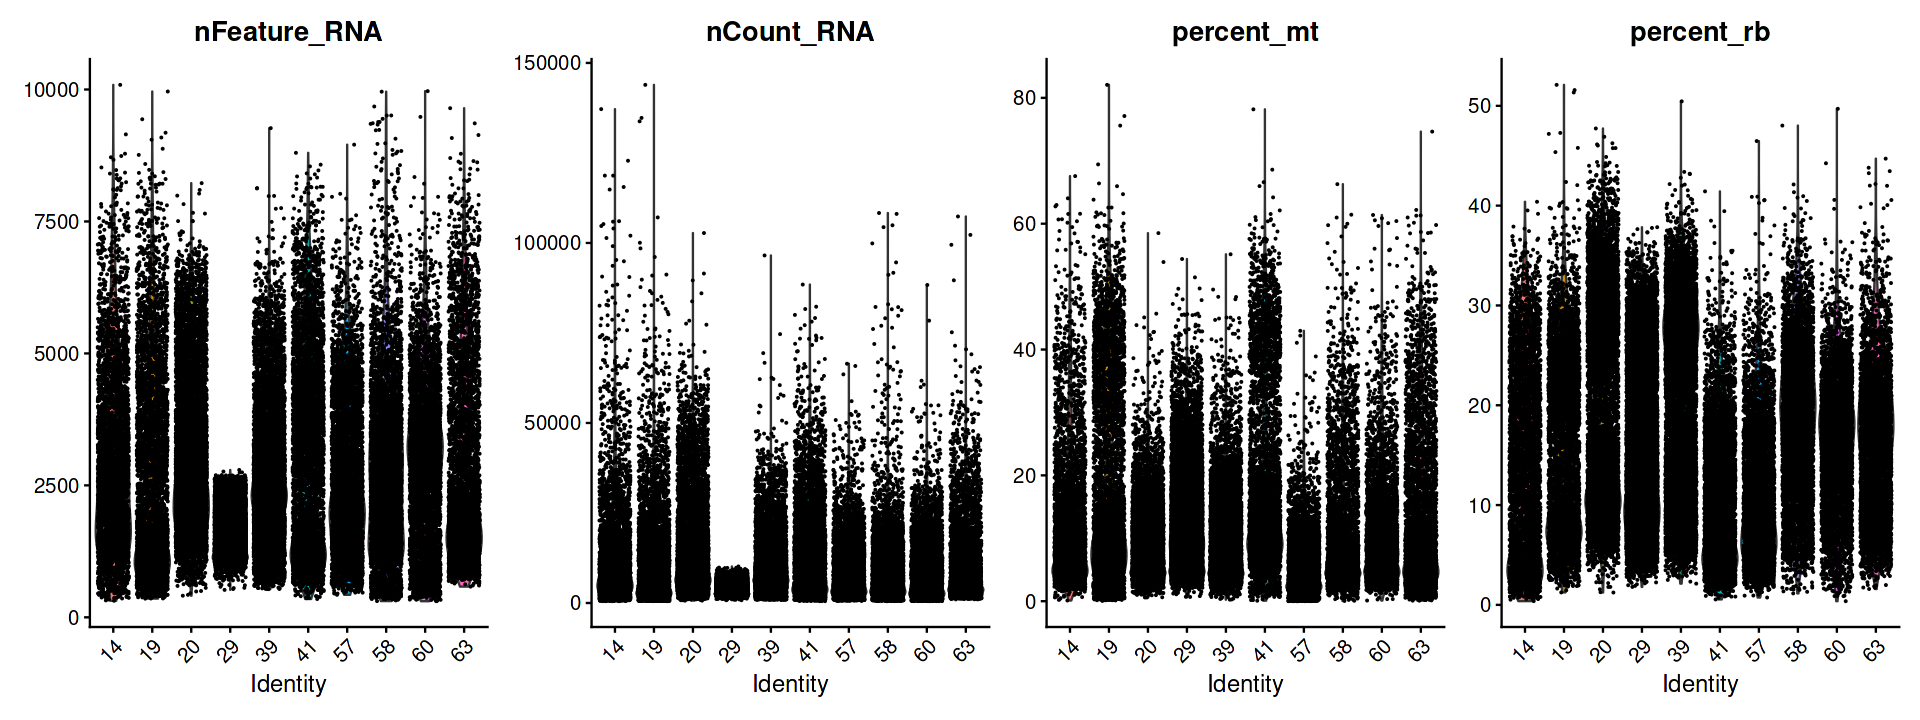

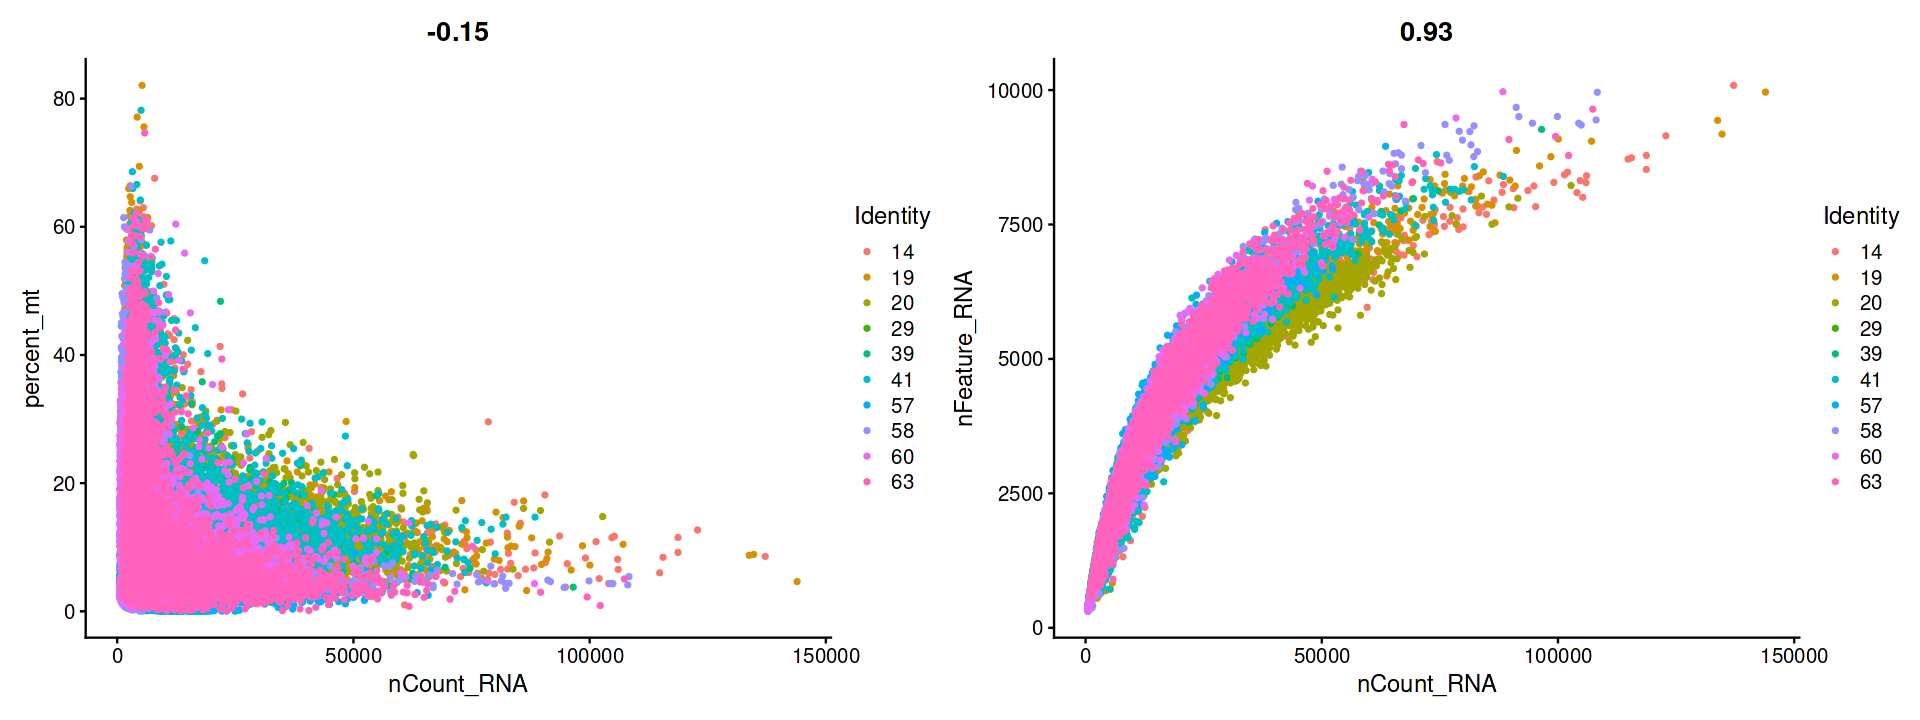

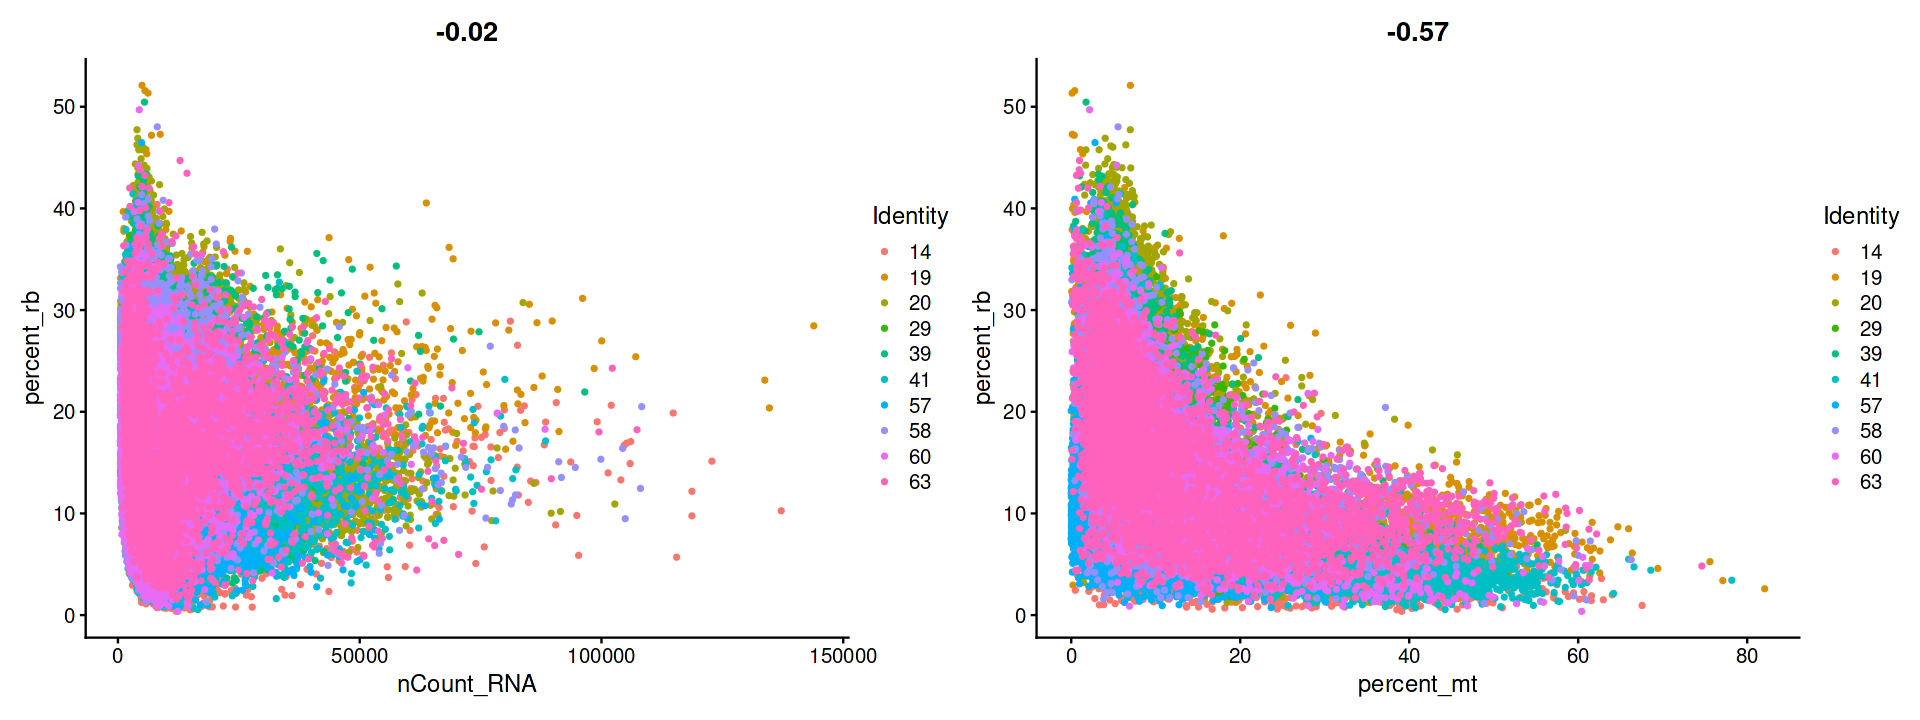

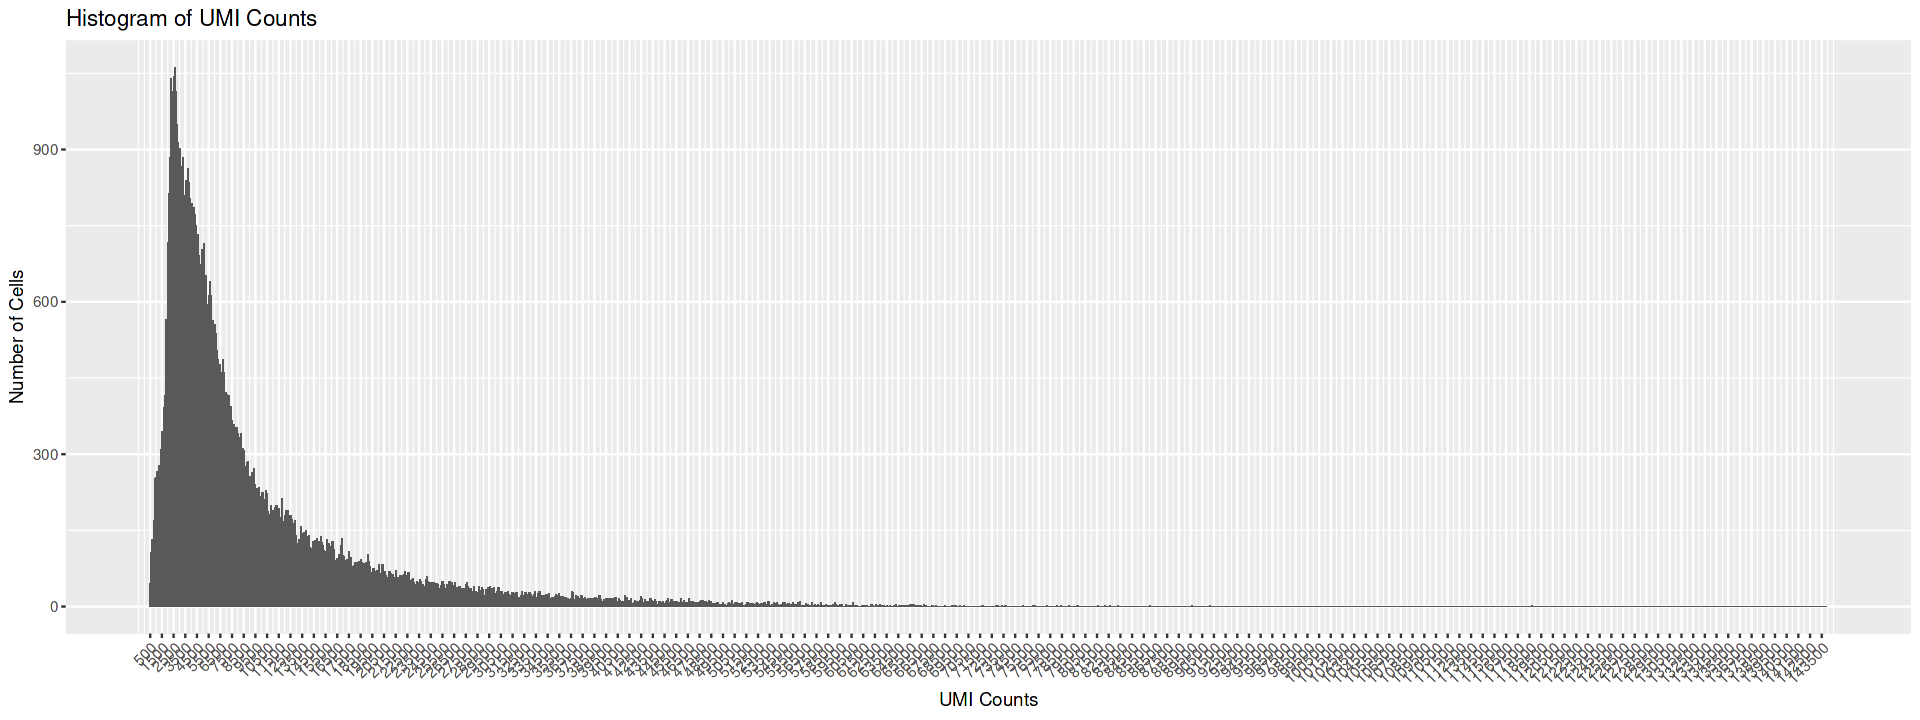

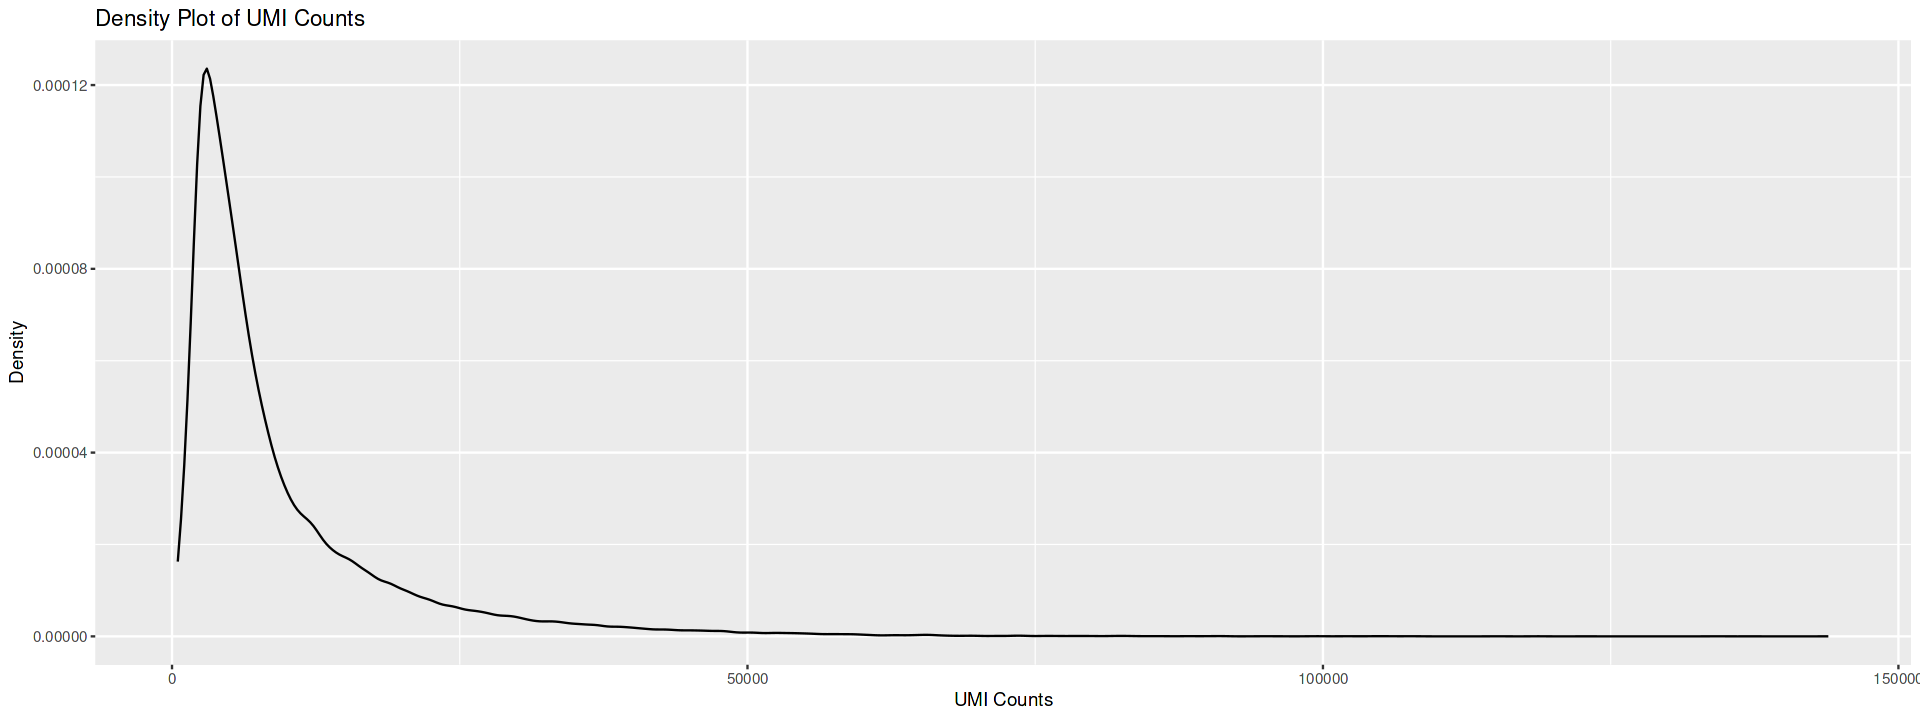

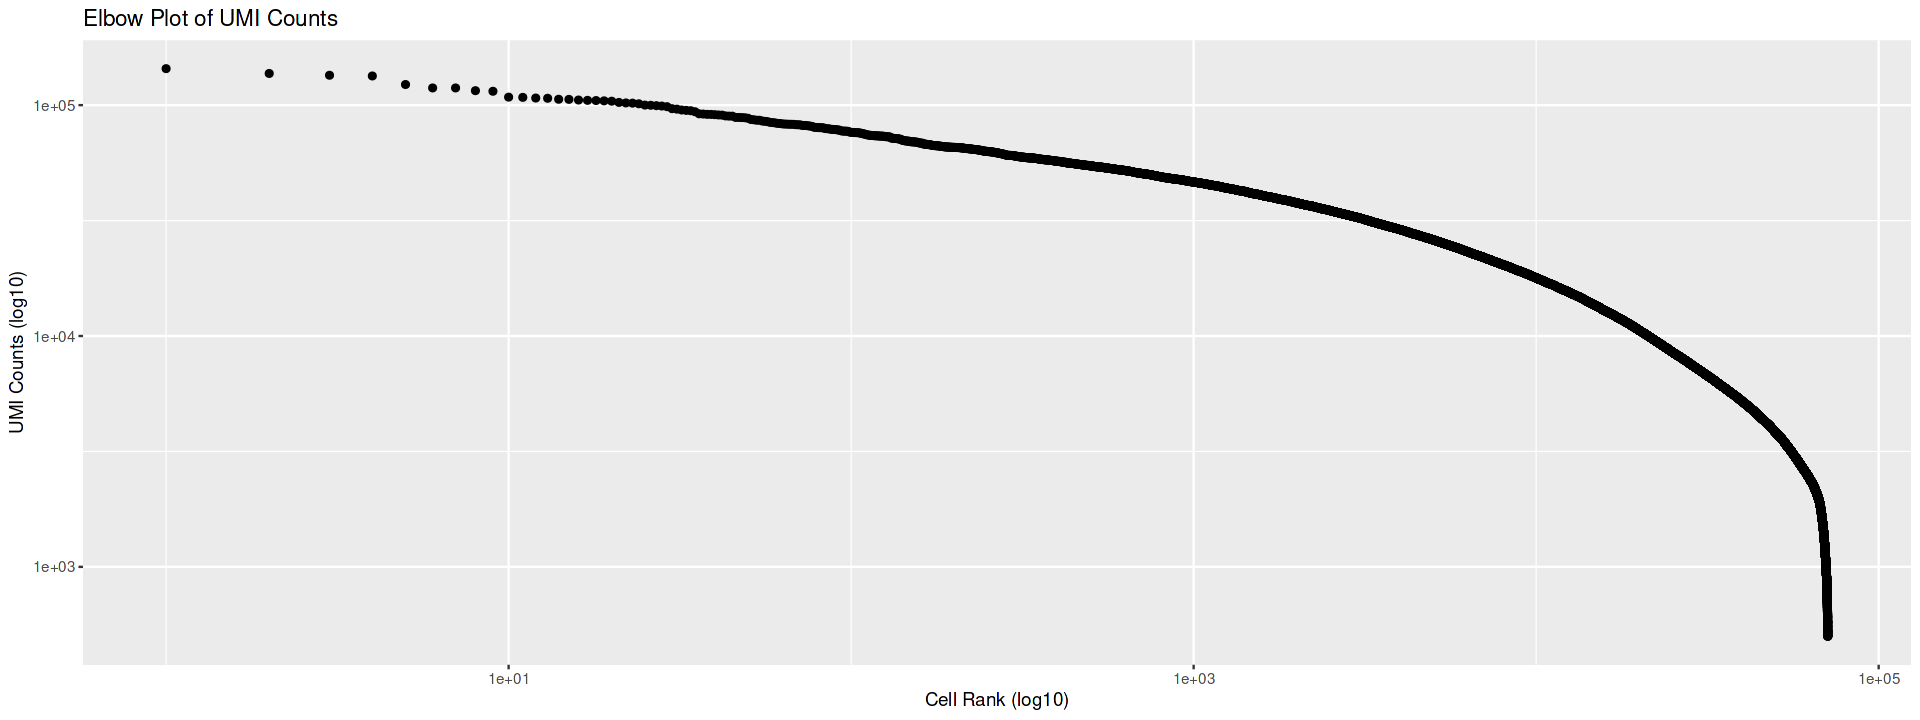

In [129]:
wg_vv <- do_QC(wg_vv, "results/2023-03" ,"wang_QC")

In [130]:
wg_vv

An object of class Seurat 
60424 features across 71032 samples within 2 assays 
Active assay: SCT (26886 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
60424 features across 524 samples within 2 assays 
Active assay: SCT (26886 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

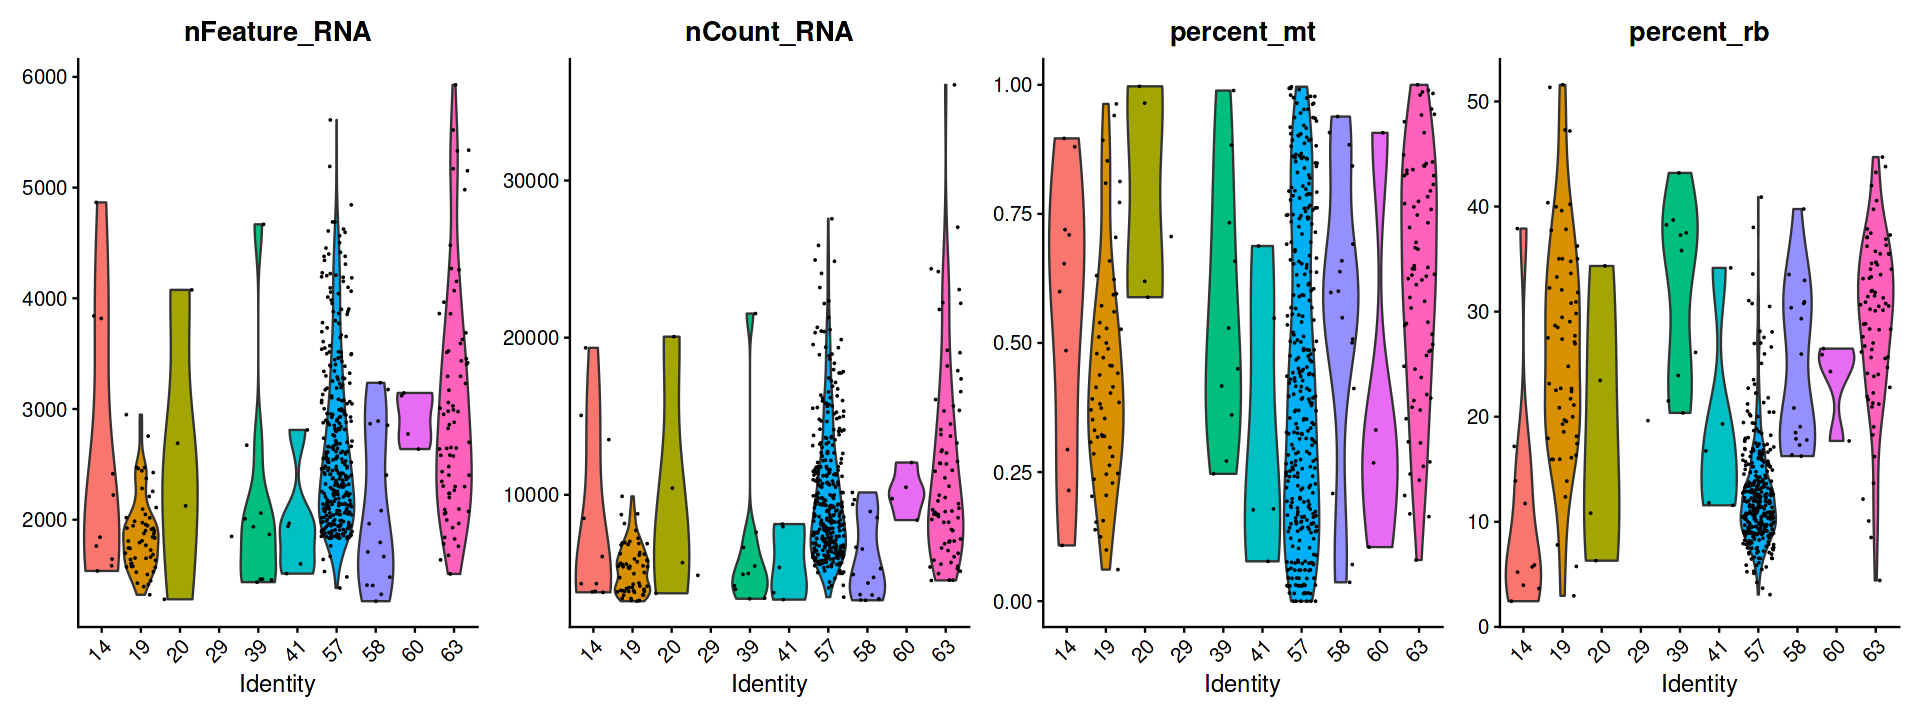

In [112]:
# use the same QC used in Arima and see the results
temp <- subset(wg_vv, subset = nFeature_RNA > 1000 & nFeature_RNA < 6000 & percent_mt < 1 & nUMI >= 3200)
temp
VlnPlot(temp, features = c("nFeature_RNA", "nCount_RNA", "percent_mt", "percent_rb"), ncol = 4, pt.size = 0.01)

An object of class Seurat 
60424 features across 46734 samples within 2 assays 
Active assay: SCT (26886 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

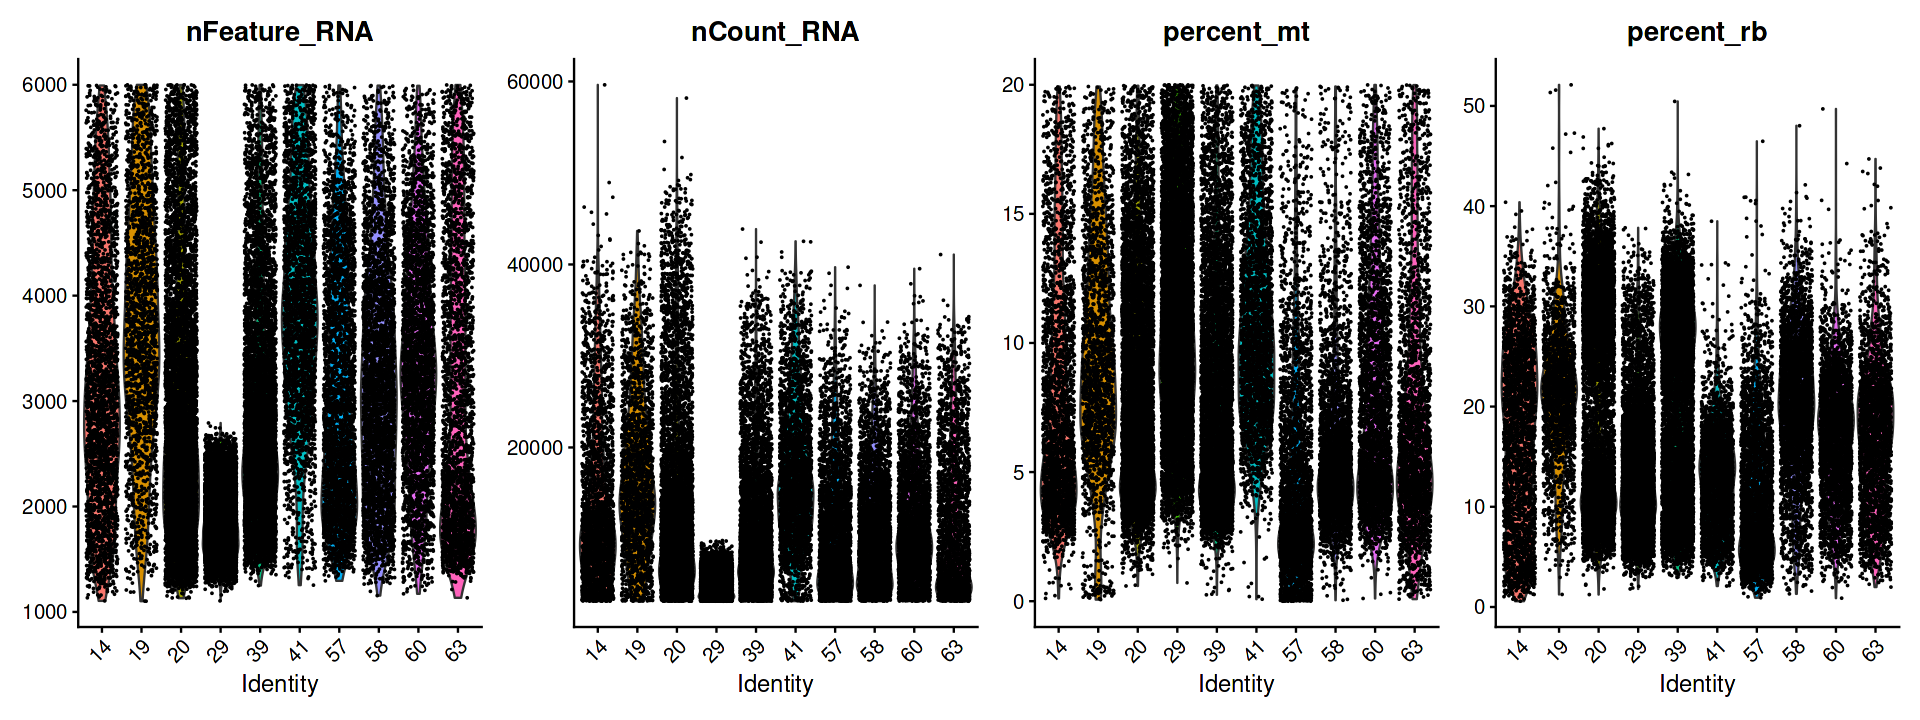

In [113]:
# Wang data has too many cells with high mitochondrial content.
temp <- subset(wg_vv, subset = nFeature_RNA > 1000 & nFeature_RNA < 6000 & percent_mt < 20 & nUMI >= 3200)
temp
VlnPlot(temp, features = c("nFeature_RNA", "nCount_RNA", "percent_mt", "percent_rb"), ncol = 4, pt.size = 0.01)

An object of class Seurat 
60424 features across 52188 samples within 2 assays 
Active assay: SCT (26886 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

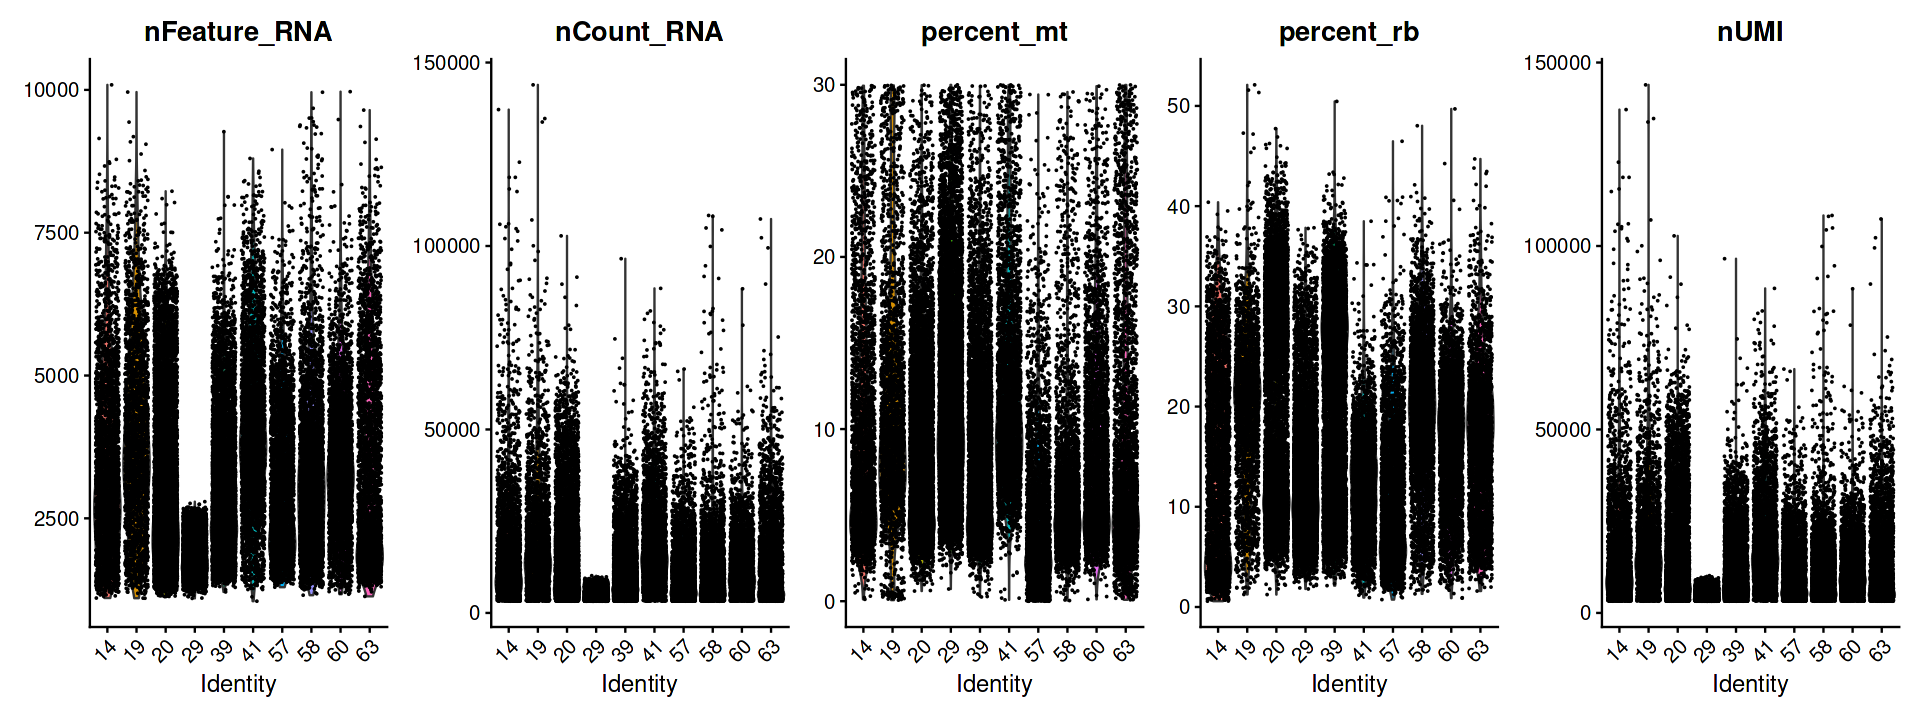

In [116]:
# Adjust accordingly to the data
temp <- subset(wg_vv, subset = nFeature_RNA > 1000 & nFeature_RNA < 50000 & percent_mt < 30 & nUMI >= 3200)
temp
VlnPlot(temp, features = c("nFeature_RNA", "nCount_RNA", "percent_mt", "percent_rb", "nUMI"), ncol = 5, pt.size = 0.01)

In [131]:
temp <- subset(wg_vv, subset = nFeature_RNA > 1000 & nFeature_RNA < 50000 & percent_mt < 30 & nUMI >= 3200)

In [132]:
wg_vv.downsized <- temp[, sample(colnames(temp), size = num_cells, replace=F)]

In [133]:
wg_vv.downsized

An object of class Seurat 
60424 features across 17537 samples within 2 assays 
Active assay: SCT (26886 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [134]:
head(wg_vv.downsized@meta.data)

orig.ident nCount_RNA nFeature_RNA donor day
29_TGTGATGTCCGTGACG 29          5410      2012         29    20 
58_GCAGTTATCACCTTAT 58         12110      3694         58    20 
19_CAGAGCCTCATGAGGG 19         17950      3776         19    22 
20_GTAGCTAGTGTTCGAT 20         24231      4445         20    22 
29_TTTCGATCACGCAGTC 29          4746      1825         29    20 
39_TGCTGAACACTTGAAC 39          5914      1998         39    23 
                    cell_type              cell_name          
29_TGTGATGTCCGTGACG Unciliated epithelia 1 29_TGTGATGTCCGTGACG
58_GCAGTTATCACCTTAT Stromal fibroblasts    58_GCAGTTATCACCTTAT
19_CAGAGCCTCATGAGGG Unciliated epithelia 2 19_CAGAGCCTCATGAGGG
20_GTAGCTAGTGTTCGAT Unciliated epithelia 1 20_GTAGCTAGTGTTCGAT
29_TTTCGATCACGCAGTC Unciliated epithelia 2 29_TTTCGATCACGCAGTC
39_TGCTGAACACTTGAAC Stromal fibroblasts    39_TGCTGAACACTTGAAC
                    phase_canonical     percent_mt percent_rb nCount_SCT
29_TGTGATGTCCGTGACG secretory_early-mid 15.246479  11.76056   5680      
58_GCAGTTATCACCTTAT secretory_early      3.328096  22.86816   7001      
19_CAGAGCCTCATGAGGG proliferative        6.637737  26.35808   6222      
20_GTAGCTAGTGTTCGAT secretory_mid       15.207523  11.75422   6168      
29_TTTCGATCACGCAGTC secretory_early-mid 11.009677  18.38598   5477      
39_TGCTGAACACTTGAAC secretory_early-mid  3.076923  34.09975   5915      
                    nFeature_SCT SCT_snn_res.0.1 SCT_snn_res.0.3
29_TGTGATGTCCGTGACG 2012         0               1              
58_GCAGTTATCACCTTAT 3367         1               2              
19_CAGAGCCTCATGAGGG 2178         2               9              
20_GTAGCTAGTGTTCGAT 2075         6               4              
29_TTTCGATCACGCAGTC 1825         0               0              
39_TGCTGAACACTTGAAC 1998         1               6              
                    SCT_snn_res.0.5 SCT_snn_res.0.8 seurat_clusters project
29_TGTGATGTCCGTGACG 0               1               1               wg_vv  
58_GCAGTTATCACCTTAT 2               8               8               wg_vv  
19_CAGAGCCTCATGAGGG 8               22              22              wg_vv  
20_GTAGCTAGTGTTCGAT 4               4               4               wg_vv  
29_TTTCGATCACGCAGTC 1               0               0               wg_vv  
39_TGCTGAACACTTGAAC 5               3               3               wg_vv  
                    nUMI 
29_TGTGATGTCCGTGACG  5410
58_GCAGTTATCACCTTAT 12110
19_CAGAGCCTCATGAGGG 17950
20_GTAGCTAGTGTTCGAT 24231
29_TTTCGATCACGCAGTC  4746
39_TGCTGAACACTTGAAC  5914

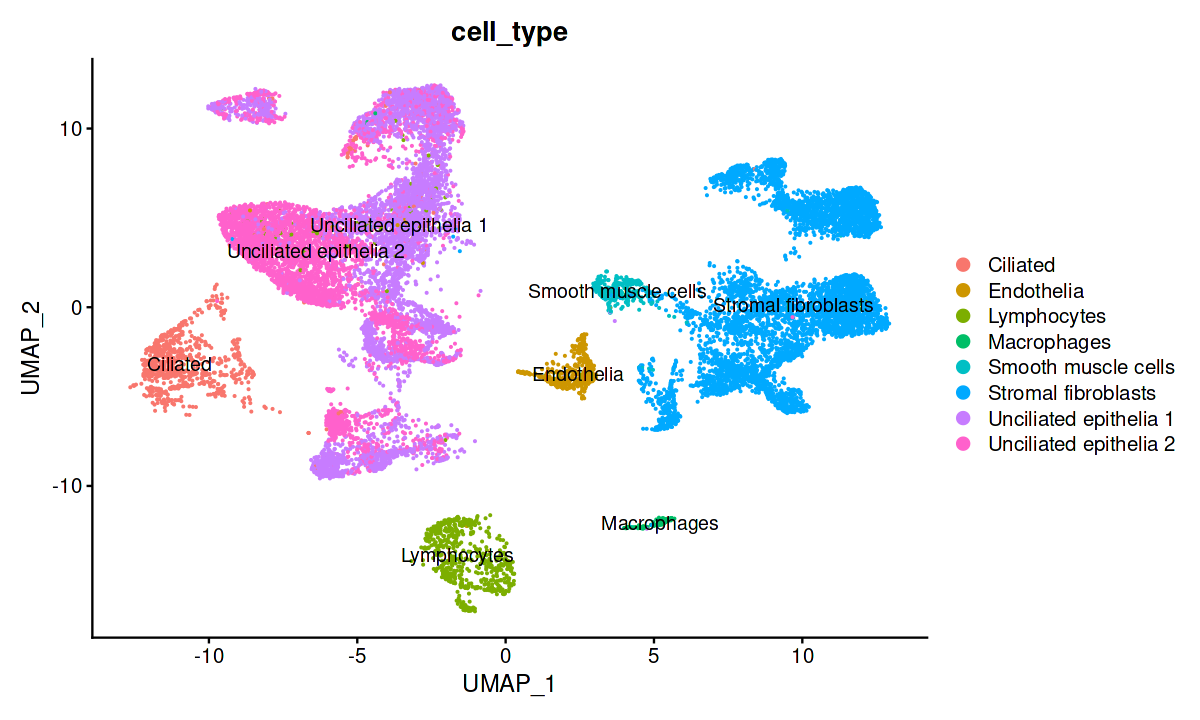

In [135]:
# Downsized dataset
plot.width = 10
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(wg_vv.downsized, reduction = "umap", group.by = "cell_type", label = TRUE)
ggsave(file="results/2023-03/wang_umap1_downsized.pdf", width = plot.width, height = plot.height)

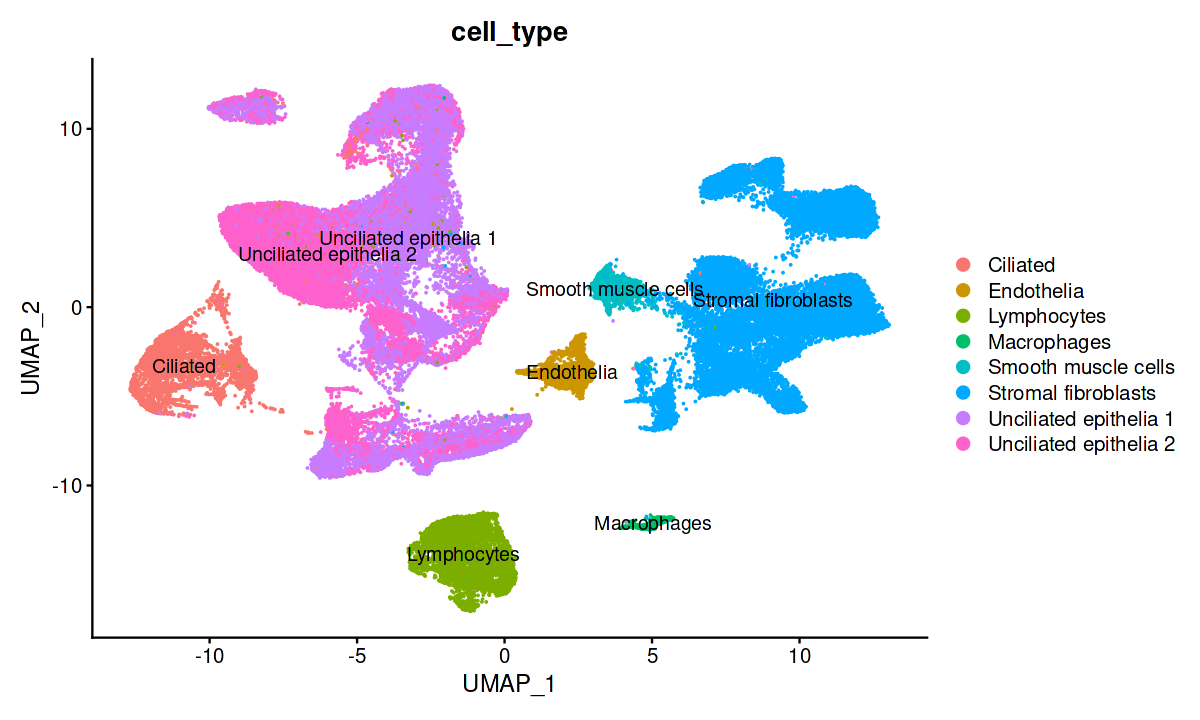

In [136]:
# Original dataset
plot.width = 10
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(wg_vv, reduction = "umap", group.by = "cell_type", label = TRUE)
ggsave(file="results/2023-03/wang_umap1_wholedata.pdf", width = plot.width, height = plot.height)

In [137]:
library(ggplot2)

# Calculate the relative frequencies of the table
data_table_rel1 <- prop.table(as.matrix(table(wg_vv.downsized$cell_type)))

# Calculate the relative frequencies of the table
data_table_rel2 <- prop.table(as.matrix(table(wg_vv$cell_type)))

# Combine the two tables vertically using rbind()
data_table_all <- rbind(data_table_rel1, data_table_rel2)

# Convert the matrix to a data frame
data_table_all <- as.data.frame(data_table_all)

names <- rownames(data_table_all)[1:8]

# Use the same name for both samples
data_table_all$cell_types <- c(names, names)
#data_table_all

# Include label
data_table_all$Color <- factor(rep(c("Downsampled", "Full"), each = 8))
#data_table_all

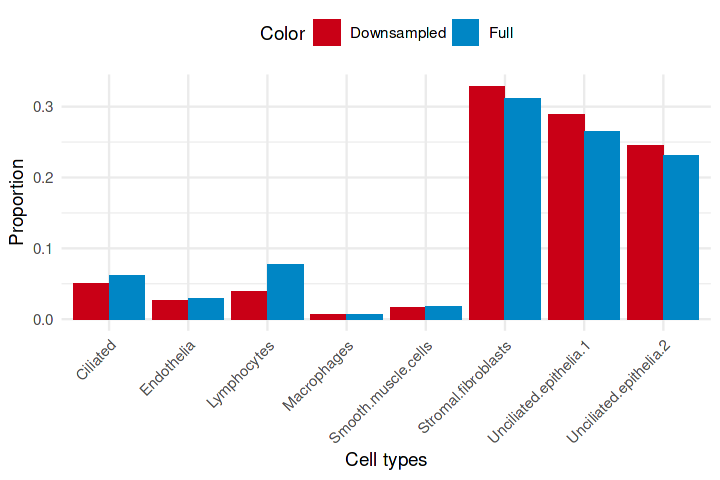

In [138]:
# Plot the bar plot of the merged tables side by side

plot.width = 6
plot.height = 4
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
ggplot(data_table_all, aes(x = cell_types, y = V1, fill = Color)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(x = "Cell types", y = "Proportion") +
  scale_fill_manual(values = c("#C90016", "#0086C5")) +
  theme_minimal() +
  theme(legend.position = "top", axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))
ggsave(file="results/2023-03/wang_downsized_whole_comparison.pdf", width = plot.width, height = plot.height)

In [139]:
# Save the do
saveRDS(wg_vv.downsized, "data/wg_vv/processed/wg_vv.downsized.rds")

#### 2. Garcia-Alonso et al., endometrial dataset

In [140]:
#load Wang, Nat Medicine, 2020
ga_vv <- LoadH5Seurat(file = "data/ga_vv/processed/ga_vv.h5seurat")

ga_vv

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding reduction umap_scvi_sampl_cc

Adding cell embeddings for umap_scvi_sampl_cc

Adding miscellaneous information for umap_scvi_sampl_cc

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



An object of class Seurat 
28614 features across 100307 samples within 1 assay 
Active assay: RNA (28614 features, 0 variable features)
 1 dimensional reduction calculated: umap_scvi_sampl_cc

In [141]:
ga_vv$project <- "ga_vv"
head(ga_vv@meta.data)

SampleID        log2p1_count percent_mito
4861STDY7387181_AAACCTGAGGCATGGT 4861STDY7387181 13.95147     0.05731962  
4861STDY7387181_AAACCTGAGGGCACTA 4861STDY7387181 13.77623     0.04383776  
4861STDY7387181_AAACCTGAGTGAAGTT 4861STDY7387181 12.89463     0.07079065  
4861STDY7387181_AAACCTGAGTGGGCTA 4861STDY7387181 12.32924     0.07113703  
4861STDY7387181_AAACCTGCACCGAAAG 4861STDY7387181 12.17118     0.06397744  
4861STDY7387181_AAACCTGCACGAGAGT 4861STDY7387181 13.58942     0.03894523  
                                 n_genes DonorID BiopsyType 
4861STDY7387181_AAACCTGAGGCATGGT 3842    A13     Organ_Donor
4861STDY7387181_AAACCTGAGGGCACTA 3544    A13     Organ_Donor
4861STDY7387181_AAACCTGAGTGAAGTT 2507    A13     Organ_Donor
4861STDY7387181_AAACCTGAGTGGGCTA 1928    A13     Organ_Donor
4861STDY7387181_AAACCTGCACCGAAAG 1824    A13     Organ_Donor
4861STDY7387181_AAACCTGCACGAGAGT 3199    A13     Organ_Donor
                                 Location             Binary.Stage 
4861STDY7387181_AAACCTGAGGCATGGT endometrium_enriched Proliferative
4861STDY7387181_AAACCTGAGGGCACTA endometrium_enriched Proliferative
4861STDY7387181_AAACCTGAGTGAAGTT endometrium_enriched Proliferative
4861STDY7387181_AAACCTGAGTGGGCTA endometrium_enriched Proliferative
4861STDY7387181_AAACCTGCACCGAAAG endometrium_enriched Proliferative
4861STDY7387181_AAACCTGCACGAGAGT endometrium_enriched Proliferative
                                 Stage         Broad.cell.type Cell.type
4861STDY7387181_AAACCTGAGGCATGGT proliferative Stromal         eS       
4861STDY7387181_AAACCTGAGGGCACTA proliferative Stromal         eS       
4861STDY7387181_AAACCTGAGTGAAGTT proliferative Supporting      PV STEAP4
4861STDY7387181_AAACCTGAGTGGGCTA proliferative Stromal         dS       
4861STDY7387181_AAACCTGCACCGAAAG proliferative Stromal         eS       
4861STDY7387181_AAACCTGCACGAGAGT proliferative Stromal         eS       
                                 CellCycle.Phase project
4861STDY7387181_AAACCTGAGGCATGGT S               ga_vv  
4861STDY7387181_AAACCTGAGGGCACTA G1              ga_vv  
4861STDY7387181_AAACCTGAGTGAAGTT G1              ga_vv  
4861STDY7387181_AAACCTGAGTGGGCTA G1              ga_vv  
4861STDY7387181_AAACCTGCACCGAAAG G1              ga_vv  
4861STDY7387181_AAACCTGCACGAGAGT G1              ga_vv

In [34]:
print(paste0("Number of cells in this experiment: ", ncol(x = ga_vv)))
print(paste0("Number of features identified: ", nrow(x = ga_vv)))

[1] "Number of cells in this experiment: 100307"
[1] "Number of features identified: 28614"


In [180]:
num_cells = ncol(x = ari_org_integrated)
print(paste0("We will downsample the published dataset to ", num_cells, " cells."))

[1] "We will downsample the published dataset to 17537 cells."


In [171]:
head(ga_vv@meta.data)

SampleID        log2p1_count percent_mito
4861STDY7387181_AAACCTGAGGCATGGT 4861STDY7387181 13.95147     0.05731962  
4861STDY7387181_AAACCTGAGGGCACTA 4861STDY7387181 13.77623     0.04383776  
4861STDY7387181_AAACCTGAGTGAAGTT 4861STDY7387181 12.89463     0.07079065  
4861STDY7387181_AAACCTGAGTGGGCTA 4861STDY7387181 12.32924     0.07113703  
4861STDY7387181_AAACCTGCACCGAAAG 4861STDY7387181 12.17118     0.06397744  
4861STDY7387181_AAACCTGCACGAGAGT 4861STDY7387181 13.58942     0.03894523  
                                 n_genes DonorID BiopsyType 
4861STDY7387181_AAACCTGAGGCATGGT 3842    A13     Organ_Donor
4861STDY7387181_AAACCTGAGGGCACTA 3544    A13     Organ_Donor
4861STDY7387181_AAACCTGAGTGAAGTT 2507    A13     Organ_Donor
4861STDY7387181_AAACCTGAGTGGGCTA 1928    A13     Organ_Donor
4861STDY7387181_AAACCTGCACCGAAAG 1824    A13     Organ_Donor
4861STDY7387181_AAACCTGCACGAGAGT 3199    A13     Organ_Donor
                                 Location             Binary.Stage 
4861STDY7387181_AAACCTGAGGCATGGT endometrium_enriched Proliferative
4861STDY7387181_AAACCTGAGGGCACTA endometrium_enriched Proliferative
4861STDY7387181_AAACCTGAGTGAAGTT endometrium_enriched Proliferative
4861STDY7387181_AAACCTGAGTGGGCTA endometrium_enriched Proliferative
4861STDY7387181_AAACCTGCACCGAAAG endometrium_enriched Proliferative
4861STDY7387181_AAACCTGCACGAGAGT endometrium_enriched Proliferative
                                 Stage         Broad.cell.type Cell.type
4861STDY7387181_AAACCTGAGGCATGGT proliferative Stromal         eS       
4861STDY7387181_AAACCTGAGGGCACTA proliferative Stromal         eS       
4861STDY7387181_AAACCTGAGTGAAGTT proliferative Supporting      PV STEAP4
4861STDY7387181_AAACCTGAGTGGGCTA proliferative Stromal         dS       
4861STDY7387181_AAACCTGCACCGAAAG proliferative Stromal         eS       
4861STDY7387181_AAACCTGCACGAGAGT proliferative Stromal         eS       
                                 CellCycle.Phase project
4861STDY7387181_AAACCTGAGGCATGGT S               ga_vv  
4861STDY7387181_AAACCTGAGGGCACTA G1              ga_vv  
4861STDY7387181_AAACCTGAGTGAAGTT G1              ga_vv  
4861STDY7387181_AAACCTGAGTGGGCTA G1              ga_vv  
4861STDY7387181_AAACCTGCACCGAAAG G1              ga_vv  
4861STDY7387181_AAACCTGCACGAGAGT G1              ga_vv

In [145]:
Idents(ga_vv) <- ga_vv$DonorID

In [147]:
# This preprocessed dataset do not provide raw counts.
#ga_vv <- do_QC(ga_vv, "results/2023-03" ,"ga_vv_QC")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



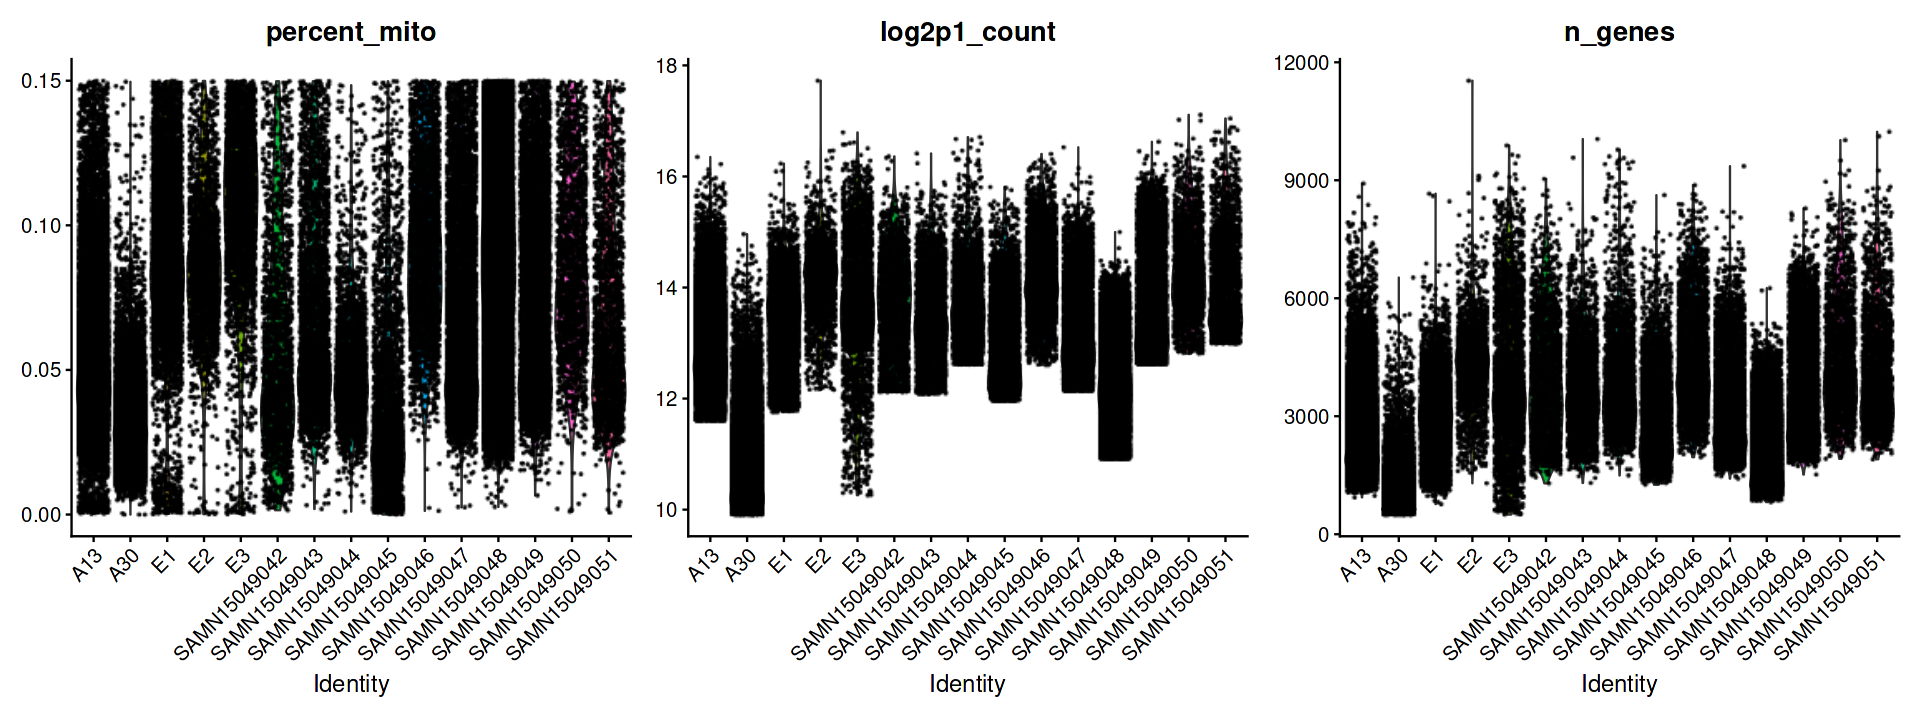

In [172]:
plot.width = 16
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
VlnPlot(ga_vv, features = c("percent_mito", "log2p1_count", "n_genes"), ncol = 3)

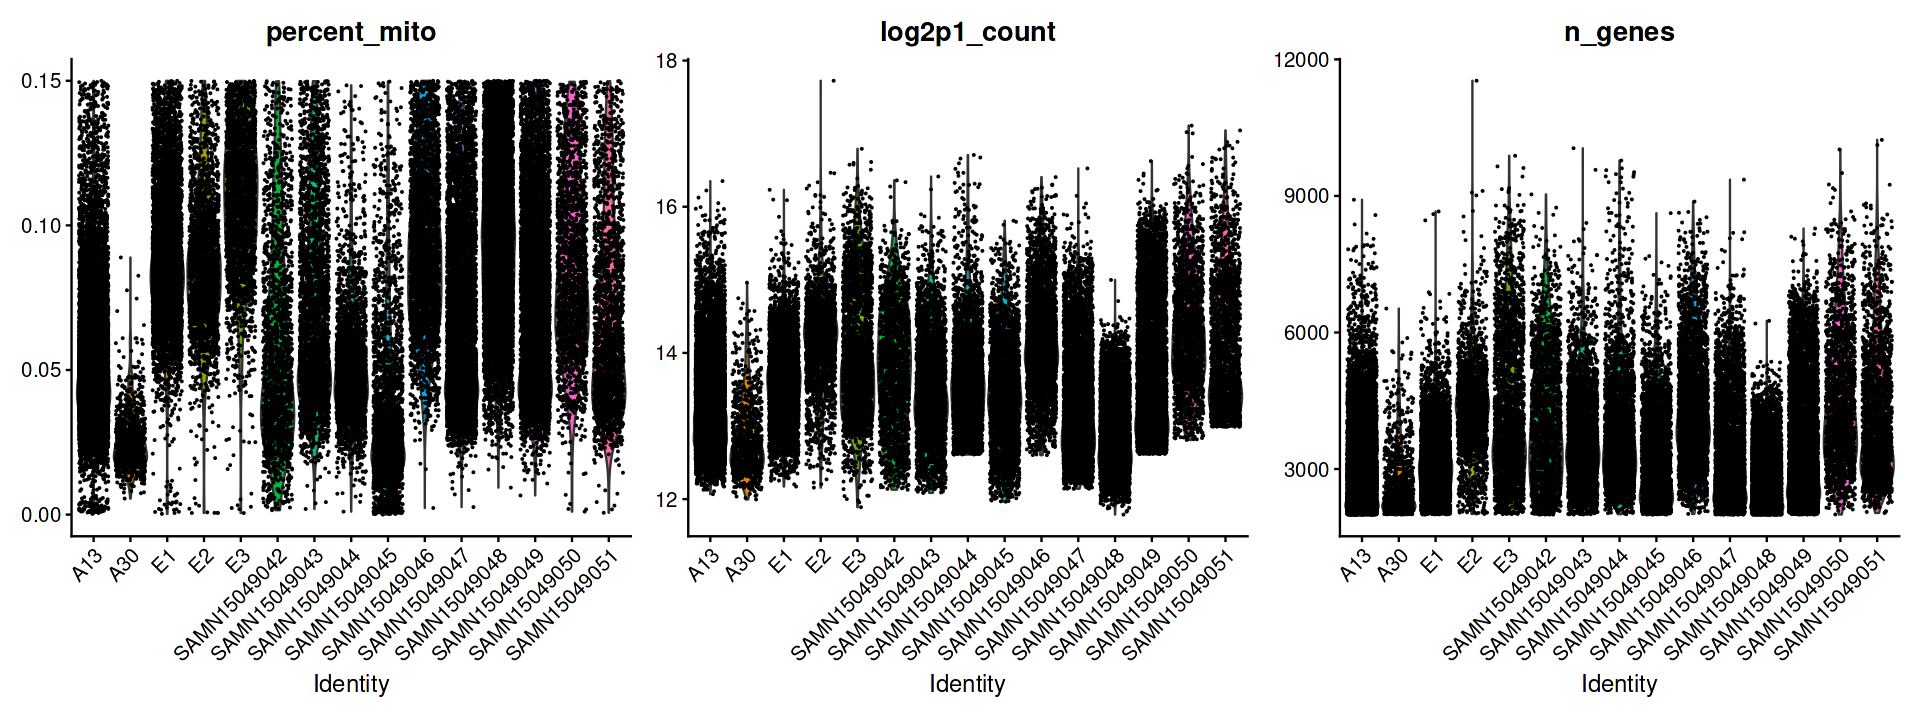

In [175]:
# Because these data was highly preprocessed, I don't want to modify anything there.
#temp <- subset(wg_vv, subset = nFeature_RNA > 1000 & nFeature_RNA < 50000 & percent_mt < 30 & nUMI >= 3200)
temp <- subset(ga_vv, subset = n_genes >= 2000)
plot.width = 16
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
VlnPlot(temp, features = c("percent_mito", "log2p1_count", "n_genes"), ncol = 3)

In [177]:
ga_vv
temp

An object of class Seurat 
28614 features across 100307 samples within 1 assay 
Active assay: RNA (28614 features, 0 variable features)
 1 dimensional reduction calculated: umap_scvi_sampl_cc

An object of class Seurat 
28614 features across 63695 samples within 1 assay 
Active assay: RNA (28614 features, 0 variable features)
 1 dimensional reduction calculated: umap_scvi_sampl_cc

In [178]:
ga_vv.downsized <- temp[, sample(colnames(temp), size = num_cells, replace=F)]

In [179]:
ga_vv.downsized

An object of class Seurat 
28614 features across 17537 samples within 1 assay 
Active assay: RNA (28614 features, 0 variable features)
 1 dimensional reduction calculated: umap_scvi_sampl_cc

In [181]:
library(ggplot2)

# Calculate the relative frequencies of the table
data_table_rel1 <- prop.table(as.matrix(table(ga_vv.downsized$Cell.type)))

# Calculate the relative frequencies of the table
data_table_rel2 <- prop.table(as.matrix(table(ga_vv$Cell.type)))

# Combine the two tables vertically using rbind()
data_table_all <- rbind(data_table_rel1, data_table_rel2)

# Convert the matrix to a data frame
data_table_all <- as.data.frame(data_table_all)

names <- rownames(data_table_rel1)
num_samples <- 2

# Use the same name for both samples
data_table_all$cell_types <- rep(names, num_samples)
#data_table_all

num_celltypes <- length(unique(ga_vv.downsized$Cell.type))

# Include label
data_table_all$Color <- factor(rep(c("Downsampled", "Full"), each = num_celltypes))
data_table_all

V1          cell_types         Color      
SOX9                 0.055368649 SOX9               Downsampled
Lumenal              0.152933797 Lumenal            Downsampled
Glandular            0.149683526 Glandular          Downsampled
Ciliated             0.041968410 Ciliated           Downsampled
Lymphoid             0.017790956 Lymphoid           Downsampled
Myeloid              0.008553344 Myeloid            Downsampled
Endothelial.ACKR1    0.050179620 Endothelial ACKR1  Downsampled
Endothelial.SEMA3G   0.003307293 Endothelial SEMA3G Downsampled
PV.MYH11             0.009693790 PV MYH11           Downsampled
PV.STEAP4            0.023892342 PV STEAP4          Downsampled
uSMC                 0.008895478 uSMC               Downsampled
Fibroblast.C7        0.002451959 Fibroblast C7      Downsampled
eS                   0.176598050 eS                 Downsampled
dS                   0.278553915 dS                 Downsampled
Other                0.020128870 Other              Downsampled
SOX9.1               0.036348410 SOX9               Full       
Lumenal.1            0.142083803 Lumenal            Full       
Glandular.1          0.130599061 Glandular          Full       
Ciliated.1           0.031792397 Ciliated           Full       
Lymphoid.1           0.023039269 Lymphoid           Full       
Myeloid.1            0.007586709 Myeloid            Full       
Endothelial.ACKR1.1  0.071660004 Endothelial ACKR1  Full       
Endothelial.SEMA3G.1 0.003878094 Endothelial SEMA3G Full       
PV.MYH11.1           0.034035511 PV MYH11           Full       
PV.STEAP4.1          0.033347623 PV STEAP4          Full       
uSMC.1               0.077222926 uSMC               Full       
Fibroblast.C7.1      0.009291475 Fibroblast C7      Full       
eS.1                 0.126362068 eS                 Full       
dS.1                 0.243612111 dS                 Full       
Other.1              0.029140539 Other              Full

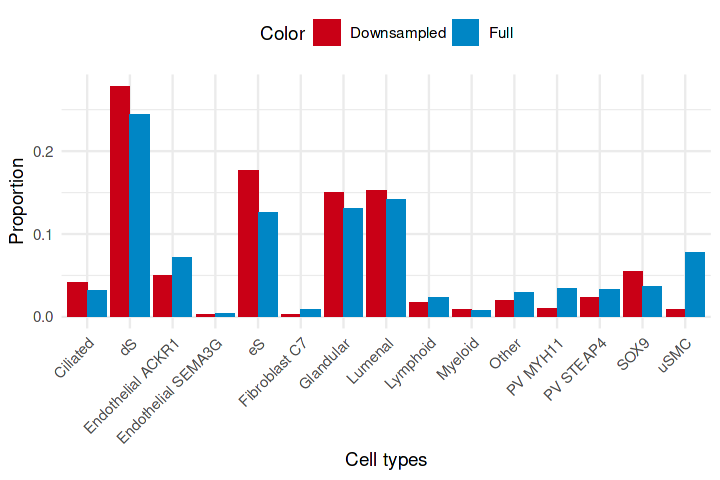

In [182]:
# Plot the bar plot of the merged tables side by side

plot.width = 6
plot.height = 4
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
ggplot(data_table_all, aes(x = cell_types, y = V1, fill = Color)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(x = "Cell types", y = "Proportion") +
  scale_fill_manual(values = c("#C90016", "#0086C5")) +
  theme_minimal() +
  theme(legend.position = "top", axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))
ggsave(file="results/2023-03/ga_vivo_downsized_whole_comparison.pdf", width = plot.width, height = plot.height)

In [183]:
# Save the do
saveRDS(ga_vv.downsized, "data/ga_vv/processed/ga_vv.downsized.rds")

#### 3. Garcia-Alonso et al., organoid dataset

In [7]:
num_cells = ncol(x = ari_org_integrated)
print(paste0("We will downsample the published dataset to ", num_cells, " cells."))

[1] "We will downsample the published dataset to 17537 cells."


In [8]:
#load Wang, Nat Medicine, 2020
ga_org <- LoadH5Seurat(file = "data/ga_org/processed/ga_org.h5seurat")
ga_org

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for umap

Adding reduction umap_without_inhibitors

Adding cell embeddings for umap_without_inhibitors

Adding miscellaneous information for umap_without_inhibitors

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



An object of class Seurat 
27254 features across 118672 samples within 1 assay 
Active assay: RNA (27254 features, 0 variable features)
 2 dimensional reductions calculated: umap, umap_without_inhibitors

In [9]:
ga_org$project <- "ga_org"
head(ga_org@meta.data)

demultiplexed sample_names    log2p1_count
WSSS_END9397520_AAACCCAAGTAGGAAG U2            WSSS_END9397520 13.90256    
WSSS_END9397520_AAACCCACACAAGCTT U2            WSSS_END9397520 13.43814    
WSSS_END9397520_AAACCCACACATGTTG U1            WSSS_END9397520 13.58578    
WSSS_END9397520_AAACCCACACTCAAGT U1            WSSS_END9397520 12.75113    
WSSS_END9397520_AAACCCAGTCGCACAC U1            WSSS_END9397520 13.38235    
WSSS_END9397520_AAACCCAGTCTTACAG U1            WSSS_END9397520 16.06352    
                                 percent_mito n_genes Days Hormones Inhibitor
WSSS_END9397520_AAACCCAAGTAGGAAG 0.13197936   3837    0    Ctrl     Ctrl     
WSSS_END9397520_AAACCCACACAAGCTT 0.08659218   3261    0    Ctrl     Ctrl     
WSSS_END9397520_AAACCCACACATGTTG 0.12461364   3421    0    Ctrl     Ctrl     
WSSS_END9397520_AAACCCACACTCAAGT 0.09531409   2488    0    Ctrl     Ctrl     
WSSS_END9397520_AAACCCAGTCGCACAC 0.12718928   3137    0    Ctrl     Ctrl     
WSSS_END9397520_AAACCCAGTCTTACAG 0.11206833   8098    0    Ctrl     Ctrl     
                                 IsClonal Celltype_without_inhibitors Celltype
WSSS_END9397520_AAACCCAAGTAGGAAG FALSE    NH_Day0                     NH_d0   
WSSS_END9397520_AAACCCACACAAGCTT FALSE    NH_Day0                     NH_d0   
WSSS_END9397520_AAACCCACACATGTTG FALSE    NH_Day0                     NH_d0   
WSSS_END9397520_AAACCCACACTCAAGT FALSE    NH_Day0                     NH_d0   
WSSS_END9397520_AAACCCAGTCGCACAC FALSE    NH_Day0                     NH_d0   
WSSS_END9397520_AAACCCAGTCTTACAG FALSE    NH_Day0                     NH_d0   
                                 CellCycle.Phase project
WSSS_END9397520_AAACCCAAGTAGGAAG G2M             ga_org 
WSSS_END9397520_AAACCCACACAAGCTT G2M             ga_org 
WSSS_END9397520_AAACCCACACATGTTG G1              ga_org 
WSSS_END9397520_AAACCCACACTCAAGT G1              ga_org 
WSSS_END9397520_AAACCCAGTCGCACAC G1              ga_org 
WSSS_END9397520_AAACCCAGTCTTACAG G2M             ga_org

In [10]:
table(ga_org@meta.data$Celltype)


                NH_d0              NH_d2_d6                 NH_d6 
                 9238                 20759                   463 
           NH_d2_WNTi            NH_d6_WNTi Estrogen_induced_PGR+ 
                 8712                 13052                 15821 
         Pre-ciliated              Ciliated        Secretory_Ctrl 
                 4357                 12195                 12255 
     Secretory_NOTCHi        Secretory_WNTi           Inflamatory 
                 4648                 15066                  1568 
               Low QC 
                  538 

In [11]:
print(paste0("Number of cells in this experiment: ", ncol(x = ga_org)))
print(paste0("Number of features identified: ", nrow(x = ga_org)))

[1] "Number of cells in this experiment: 118672"
[1] "Number of features identified: 27254"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



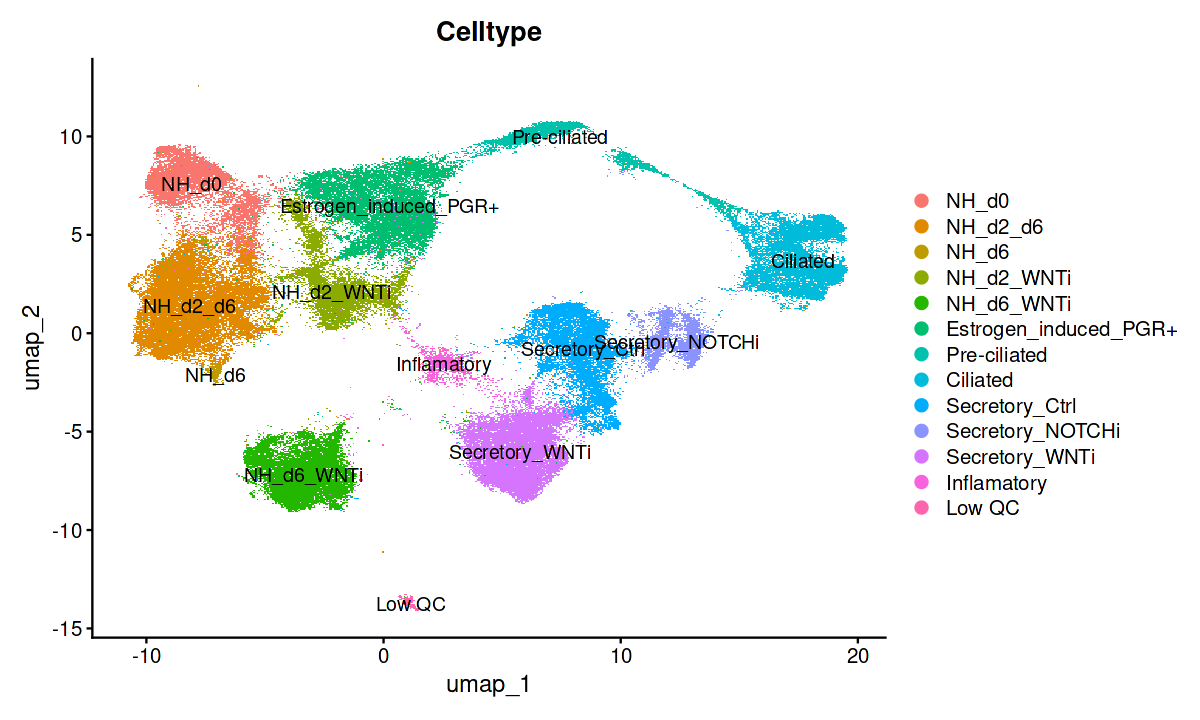

In [12]:
# Downsized dataset
plot.width = 10
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(ga_org, reduction = "umap", group.by = "Celltype", label = TRUE)
#ggsave(file="results/2023-03/wang_umap1_downsized.pdf", width = plot.width, height = plot.height)

In [13]:
Idents(ga_org) <- ga_org$sample_names

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



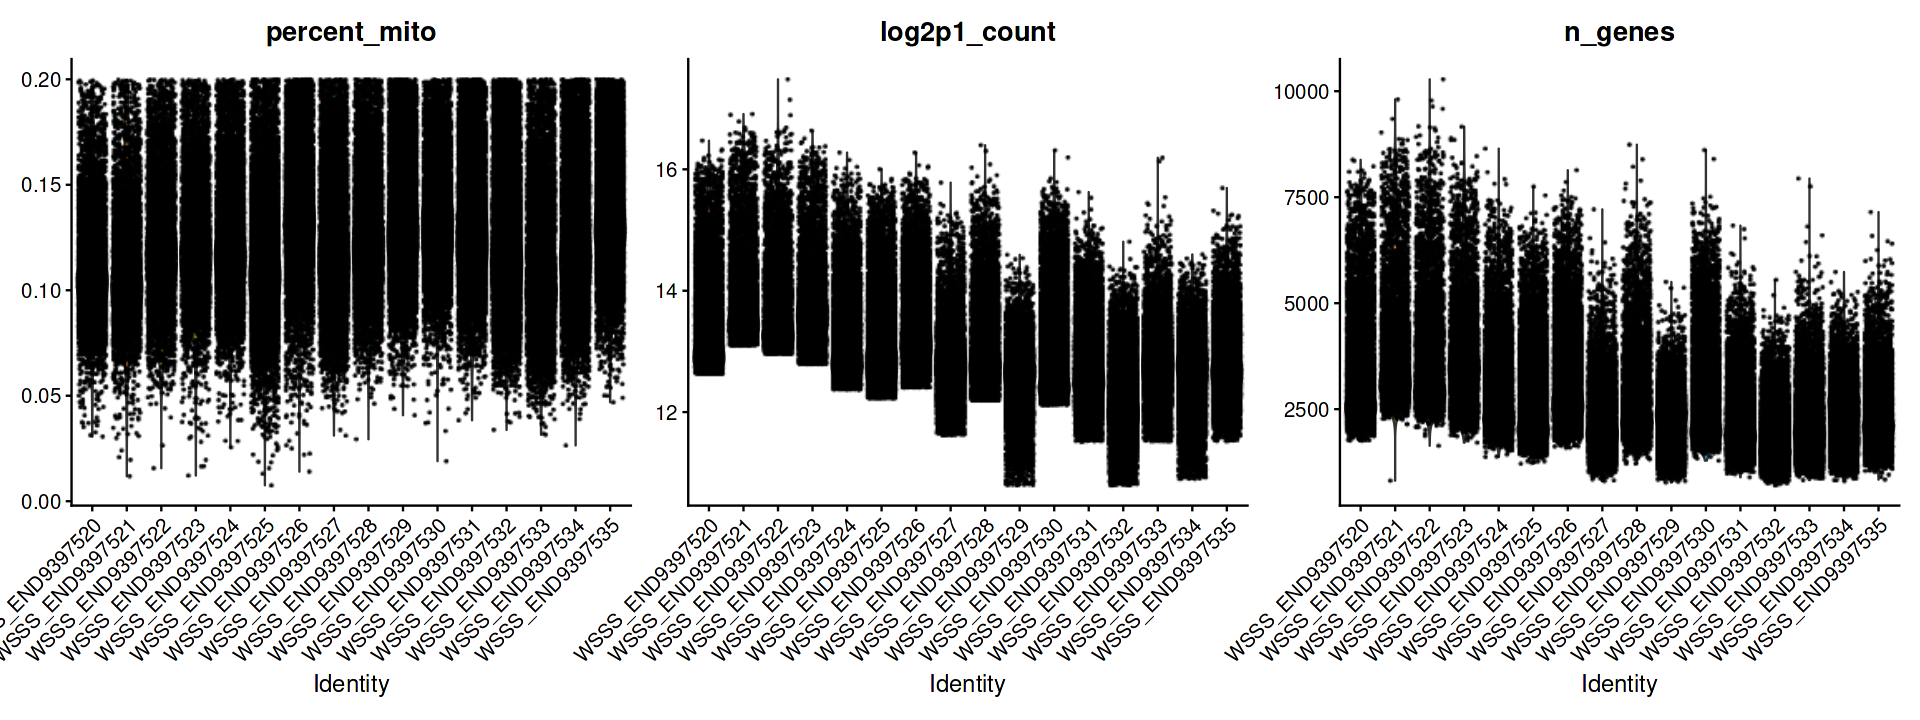

In [14]:
plot.width = 16
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
VlnPlot(ga_org, features = c("percent_mito", "log2p1_count", "n_genes"), ncol = 3)

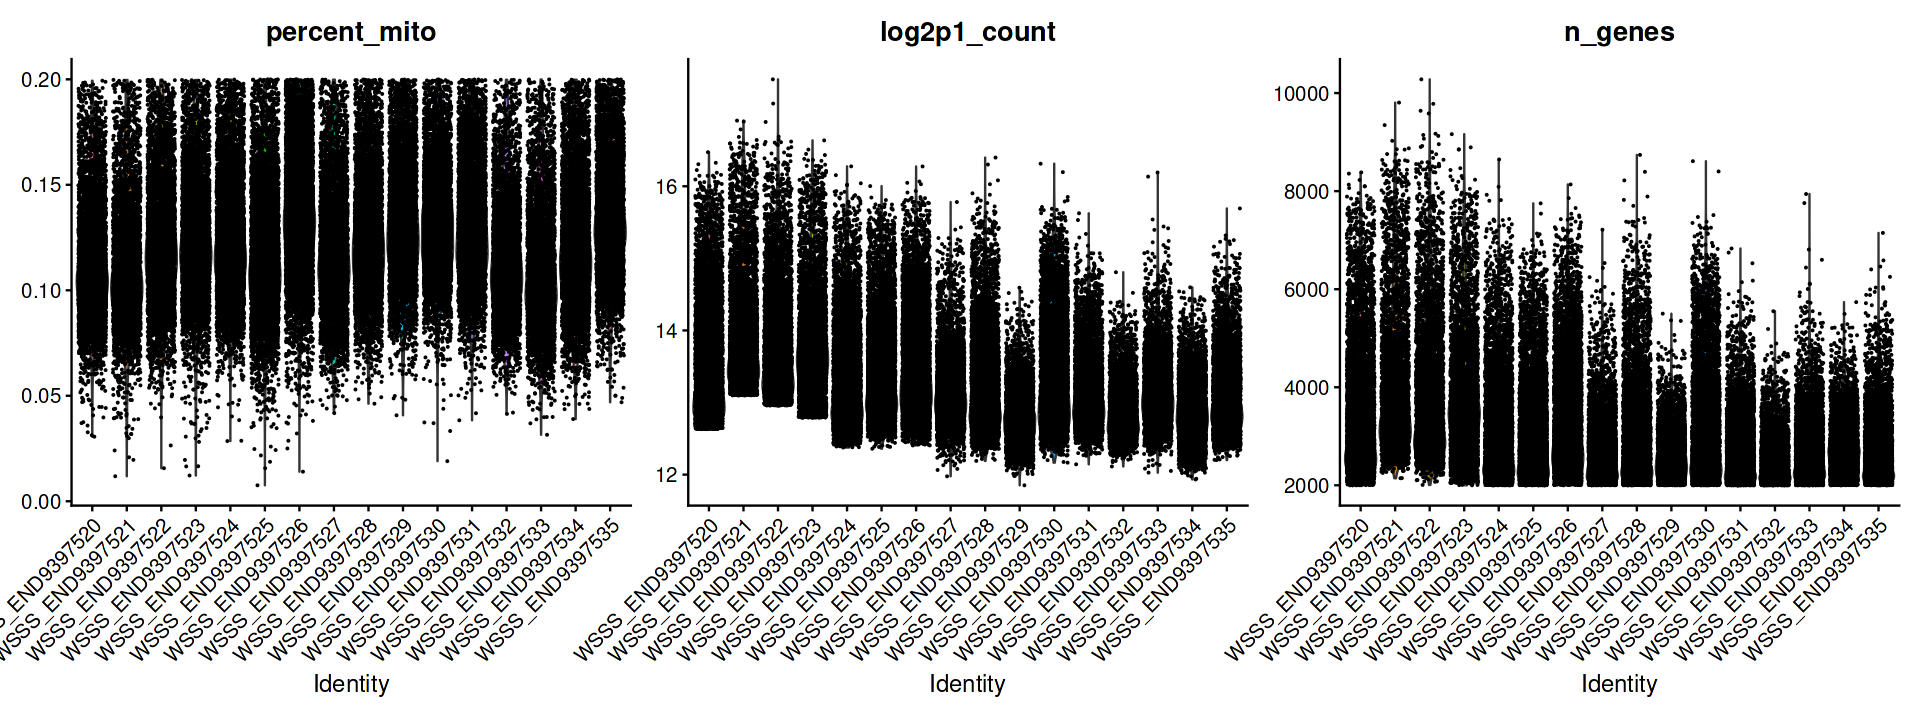

In [15]:
# Because these data was highly preprocessed, I don't want to modify anything there.
#temp <- subset(wg_vv, subset = nFeature_RNA > 1000 & nFeature_RNA < 50000 & percent_mt < 30 & nUMI >= 3200)
temp <- subset(ga_org, subset = n_genes >= 2000)
temp <- subset(temp, subset = Celltype == "Low QC", invert = TRUE)
plot.width = 16
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
VlnPlot(temp, features = c("percent_mito", "log2p1_count", "n_genes"), ncol = 3)

In [16]:
ga_org
temp

An object of class Seurat 
27254 features across 118672 samples within 1 assay 
Active assay: RNA (27254 features, 0 variable features)
 2 dimensional reductions calculated: umap, umap_without_inhibitors

An object of class Seurat 
27254 features across 85997 samples within 1 assay 
Active assay: RNA (27254 features, 0 variable features)
 2 dimensional reductions calculated: umap, umap_without_inhibitors

In [17]:
# Reduce the sample to the same size of Arima experiment
ga_org.downsized <- temp[, sample(colnames(temp), size = num_cells, replace=F)]

In [18]:
ga_org.downsized

An object of class Seurat 
27254 features across 17537 samples within 1 assay 
Active assay: RNA (27254 features, 0 variable features)
 2 dimensional reductions calculated: umap, umap_without_inhibitors

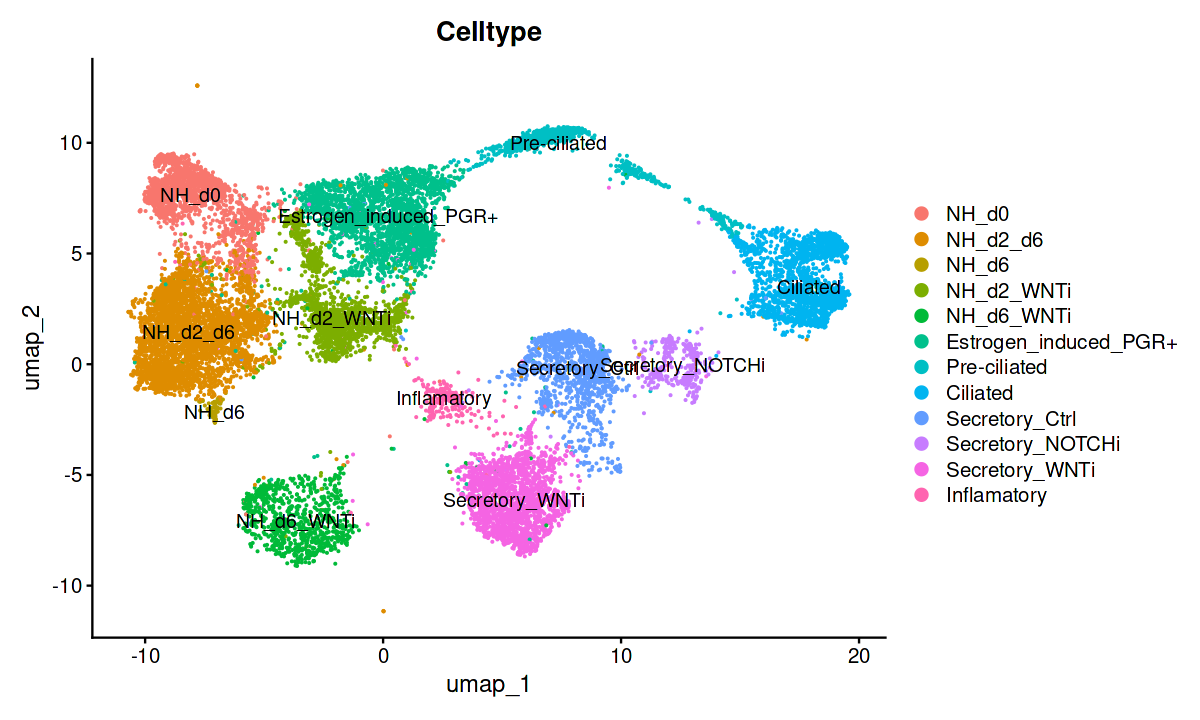

In [19]:
# Downsized dataset
plot.width = 10
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(ga_org.downsized, reduction = "umap", group.by = "Celltype", label = TRUE)
#ggsave(file="results/2023-03/wang_umap1_downsized.pdf", width = plot.width, height = plot.height)

In [214]:
library(ggplot2)

# Calculate the relative frequencies of the table
data_table_rel1 <- prop.table(as.matrix(table(ga_org.downsized$Celltype)))

# Calculate the relative frequencies of the table
data_table_rel2 <- prop.table(as.matrix(table(ga_org$Celltype)))

# Combine the two tables vertically using rbind()
data_table_all <- rbind(data_table_rel1, data_table_rel2)

# Convert the matrix to a data frame
data_table_all <- as.data.frame(data_table_all)

names <- rownames(data_table_rel1)
num_samples <- 2

# Use the same name for both samples
data_table_all$cell_types <- rep(names, num_samples)
#data_table_all

num_celltypes <- length(unique(ga_org$Celltype))

# Include label
data_table_all$Color <- factor(rep(c("Downsampled", "Full"), each = num_celltypes))
data_table_all

V1          cell_types            Color      
NH_d0                   0.107087871 NH_d0                 Downsampled
NH_d2_d6                0.207447112 NH_d2_d6              Downsampled
NH_d6                   0.004162628 NH_d6                 Downsampled
NH_d2_WNTi              0.097051947 NH_d2_WNTi            Downsampled
NH_d6_WNTi              0.049381308 NH_d6_WNTi            Downsampled
Estrogen_induced_PGR.   0.156013001 Estrogen_induced_PGR+ Downsampled
Pre.ciliated            0.048468951 Pre-ciliated          Downsampled
Ciliated                0.113930547 Ciliated              Downsampled
Secretory_Ctrl          0.069624223 Secretory_Ctrl        Downsampled
Secretory_NOTCHi        0.020356960 Secretory_NOTCHi      Downsampled
Secretory_WNTi          0.111307521 Secretory_WNTi        Downsampled
Inflamatory             0.015167931 Inflamatory           Downsampled
Low.QC                  0.000000000 Low QC                Downsampled
NH_d0.1                 0.077844816 NH_d0                 Full       
NH_d2_d6.1              0.174927531 NH_d2_d6              Full       
NH_d6.1                 0.003901510 NH_d6                 Full       
NH_d2_WNTi.1            0.073412431 NH_d2_WNTi            Full       
NH_d6_WNTi.1            0.109983821 NH_d6_WNTi            Full       
Estrogen_induced_PGR..1 0.133317042 Estrogen_induced_PGR+ Full       
Pre.ciliated.1          0.036714642 Pre-ciliated          Full       
Ciliated.1              0.102762235 Ciliated              Full       
Secretory_Ctrl.1        0.103267831 Secretory_Ctrl        Full       
Secretory_NOTCHi.1      0.039166779 Secretory_NOTCHi      Full       
Secretory_WNTi.1        0.126954968 Secretory_WNTi        Full       
Inflamatory.1           0.013212889 Inflamatory           Full       
Low.QC.1                0.004533504 Low QC                Full

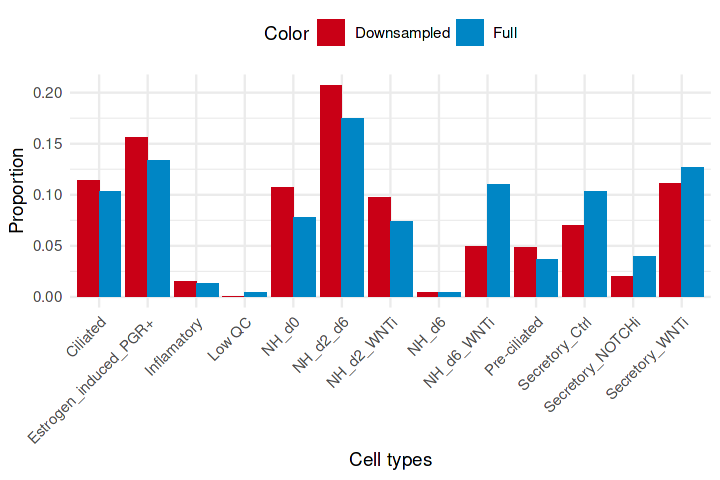

In [215]:
# Plot the bar plot of the merged tables side by side

plot.width = 6
plot.height = 4
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
ggplot(data_table_all, aes(x = cell_types, y = V1, fill = Color)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(x = "Cell types", y = "Proportion") +
  scale_fill_manual(values = c("#C90016", "#0086C5")) +
  theme_minimal() +
  theme(legend.position = "top", axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))
ggsave(file="results/2023-03/ga_organoid_downsized_whole_comparison.pdf", width = plot.width, height = plot.height)

In [216]:
# Save the do
saveRDS(ga_org.downsized, "data/ga_org/processed/ga_org.downsized.rds")

In [217]:
sessionInfo()

R version 4.2.2 Patched (2022-11-10 r83330)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/atlas/libblas.so.3.10.3
LAPACK: /usr/lib/x86_64-linux-gnu/atlas/liblapack.so.3.10.3

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] sctransform_0.3.5     forcats_0.5.2         stringr_1.5.0        
 [4] purrr_1.0.1           readr_2.1.3           tidyr_1.3.0          
 [7] tibble_3.2.1          tidyverse_1.3.2       dplyr_1.1.1          
[10] Matrix_1.5-3          ggplot2_3.4.1         patchwork_1.1.2      
[13] SeuratDisk_0.0.0.902